# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 01:09:39.000606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T01:09:42.580879
2025-04-15 01:09:42.580879


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 01:09:36"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

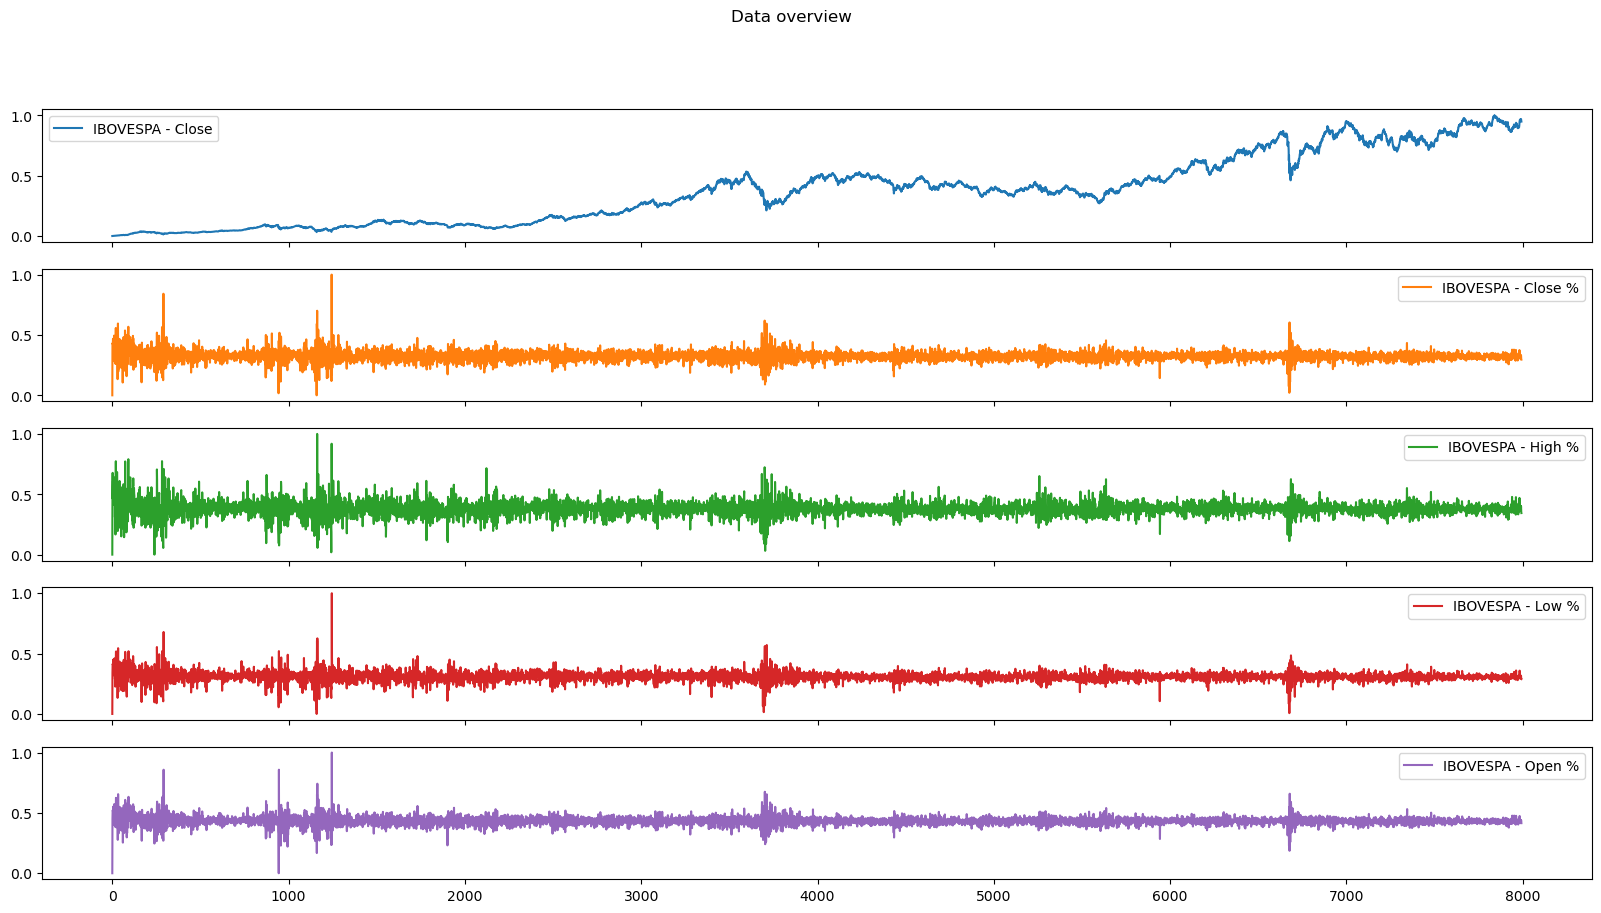

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

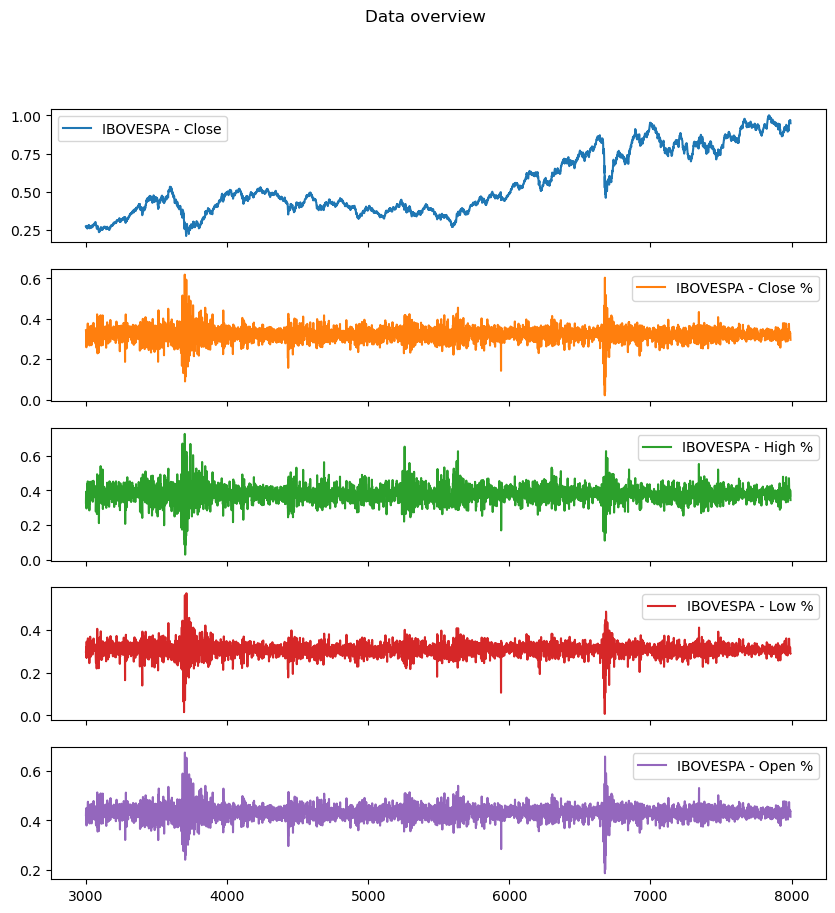

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

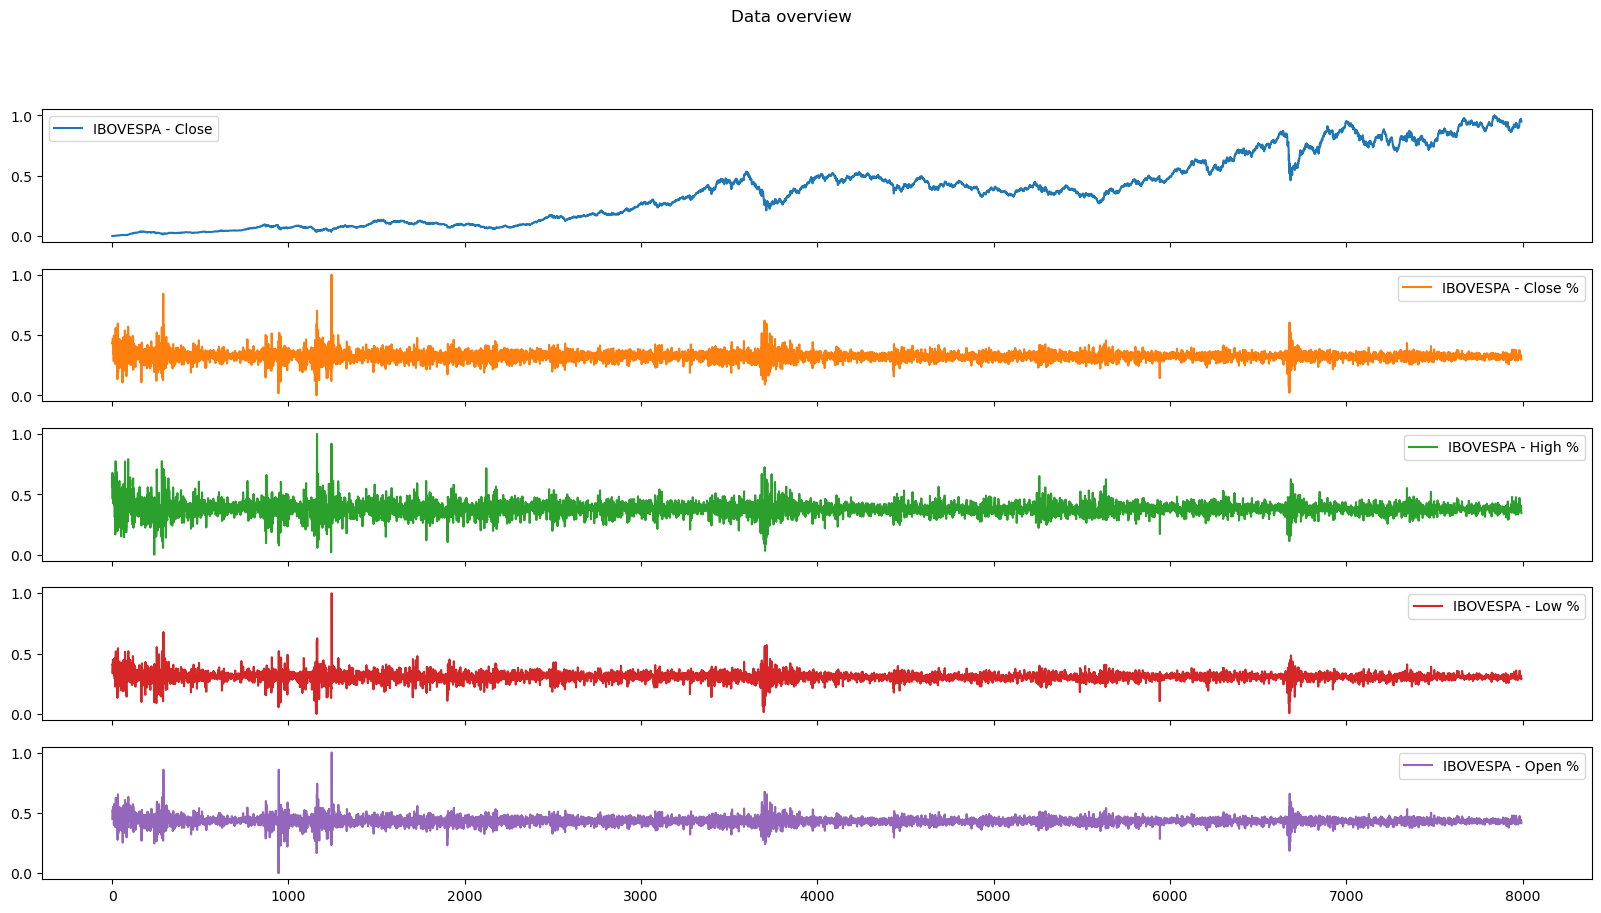

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

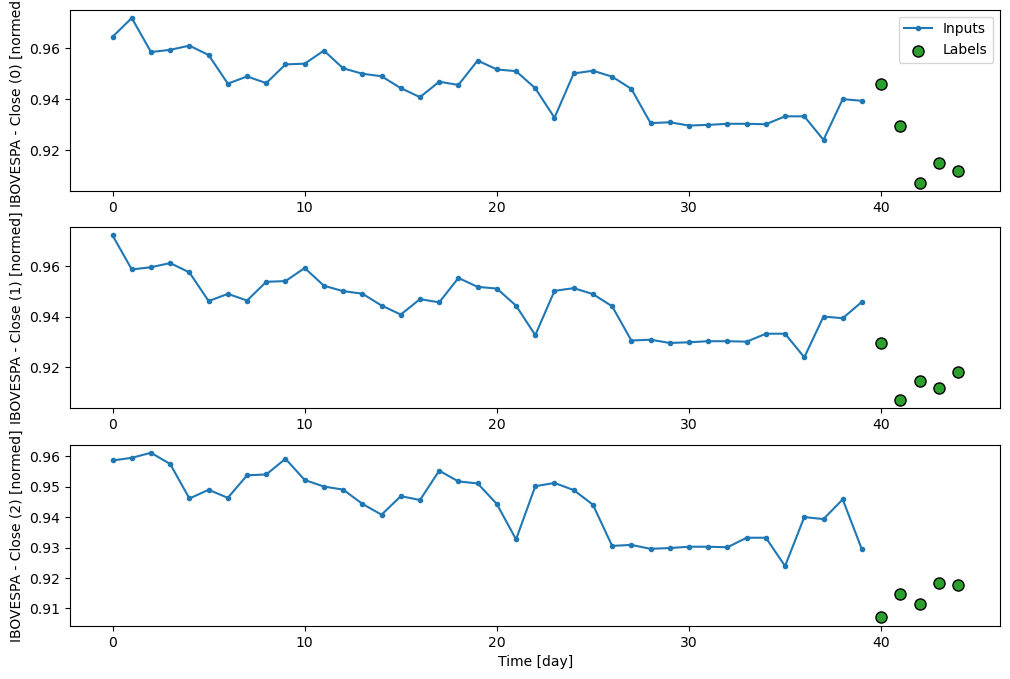

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19:10 5s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 130.1760 - mean_squared_error: 2.2960e-04 - root_mean_squared_error: 0.0144 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 117.9903 - mean_squared_error: 2.4473e-04 - root_mean_squared_error: 0.0152

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 105.0811 - mean_squared_error: 2.2940e-04 - root_mean_squared_error: 0.0148

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 95.8749 - mean_squared_error: 2.1407e-04 - root_mean_squared_error: 0.0143 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 88.5738 - mean_squared_error: 2.0008e-04 - root_mean_squared_error: 0.0138

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 82.4562 - mean_squared_error: 1.8743e-04 - root_mean_squared_error: 0.0134

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 77.4734 - mean_squared_error: 1.7685e-04 - root_mean_squared_error: 0.0130

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 73.1192 - mean_squared_error: 1.6732e-04 - root_mean_squared_error: 0.0126

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 69.3070 - mean_squared_error: 1.5887e-04 - root_mean_squared_error: 0.0123

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 65.9417 - mean_squared_error: 1.5132e-04 - root_mean_squared_error: 0.0119

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 62.9686 - mean_squared_error: 1.4477e-04 - root_mean_squared_error: 0.0117

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 60.4377 - mean_squared_error: 1.4102e-04 - root_mean_squared_error: 0.0115

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 58.2937 - mean_squared_error: 1.4197e-04 - root_mean_squared_error: 0.0116

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 56.3948 - mean_squared_error: 1.4363e-04 - root_mean_squared_error: 0.0117

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.6891 - mean_squared_error: 1.4512e-04 - root_mean_squared_error: 0.0118

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 53.1105 - mean_squared_error: 1.4600e-04 - root_mean_squared_error: 0.0118

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.6696 - mean_squared_error: 1.4674e-04 - root_mean_squared_error: 0.0119

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.4064 - mean_squared_error: 1.4789e-04 - root_mean_squared_error: 0.0119

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.2570 - mean_squared_error: 1.4904e-04 - root_mean_squared_error: 0.0120

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.1931 - mean_squared_error: 1.5015e-04 - root_mean_squared_error: 0.0120

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.1857 - mean_squared_error: 1.5090e-04 - root_mean_squared_error: 0.0121

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.2363 - mean_squared_error: 1.5157e-04 - root_mean_squared_error: 0.0121

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.3719 - mean_squared_error: 1.5423e-04 - root_mean_squared_error: 0.0122

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.5630 - mean_squared_error: 1.5726e-04 - root_mean_squared_error: 0.0123

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.7921 - mean_squared_error: 1.5992e-04 - root_mean_squared_error: 0.0124

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.0758 - mean_squared_error: 1.6299e-04 - root_mean_squared_error: 0.0126

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.3912 - mean_squared_error: 1.6576e-04 - root_mean_squared_error: 0.0127

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.7320 - mean_squared_error: 1.6812e-04 - root_mean_squared_error: 0.0127

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.1002 - mean_squared_error: 1.7016e-04 - root_mean_squared_error: 0.0128

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.4996 - mean_squared_error: 1.7199e-04 - root_mean_squared_error: 0.0129

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.9219 - mean_squared_error: 1.7356e-04 - root_mean_squared_error: 0.0130

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.3811 - mean_squared_error: 1.7523e-04 - root_mean_squared_error: 0.0130

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 38.8906 - mean_squared_error: 1.7736e-04 - root_mean_squared_error: 0.0131

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 38.4263 - mean_squared_error: 1.7939e-04 - root_mean_squared_error: 0.0132

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 37.9876 - mean_squared_error: 1.8140e-04 - root_mean_squared_error: 0.0133

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 37.5766 - mean_squared_error: 1.8364e-04 - root_mean_squared_error: 0.0133

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 37.1883 - mean_squared_error: 1.8613e-04 - root_mean_squared_error: 0.0134

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 36.8218 - mean_squared_error: 1.8928e-04 - root_mean_squared_error: 0.0135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 36.4694 - mean_squared_error: 1.9258e-04 - root_mean_squared_error: 0.0136

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 36.1252 - mean_squared_error: 1.9565e-04 - root_mean_squared_error: 0.0137

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 35.7948 - mean_squared_error: 1.9890e-04 - root_mean_squared_error: 0.0139

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 35.4785 - mean_squared_error: 2.0253e-04 - root_mean_squared_error: 0.0140

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 35.1720 - mean_squared_error: 2.0622e-04 - root_mean_squared_error: 0.0141

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 34.8725 - mean_squared_error: 2.0973e-04 - root_mean_squared_error: 0.0142

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 34.5804 - mean_squared_error: 2.1319e-04 - root_mean_squared_error: 0.0143

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 34.2995 - mean_squared_error: 2.1740e-04 - root_mean_squared_error: 0.0144

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 34.0295 - mean_squared_error: 2.2262e-04 - root_mean_squared_error: 0.0146

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 33.7668 - mean_squared_error: 2.2794e-04 - root_mean_squared_error: 0.0147

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 33.5101 - mean_squared_error: 2.3322e-04 - root_mean_squared_error: 0.0149

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 33.2595 - mean_squared_error: 2.3860e-04 - root_mean_squared_error: 0.0150

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 33.0145 - mean_squared_error: 2.4406e-04 - root_mean_squared_error: 0.0152

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 32.7742 - mean_squared_error: 2.4956e-04 - root_mean_squared_error: 0.0153

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 32.5393 - mean_squared_error: 2.5548e-04 - root_mean_squared_error: 0.0155

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 32.3072 - mean_squared_error: 2.6112e-04 - root_mean_squared_error: 0.0156

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 32.0789 - mean_squared_error: 2.6674e-04 - root_mean_squared_error: 0.0158

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 31.8559 - mean_squared_error: 2.7296e-04 - root_mean_squared_error: 0.0160

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 31.6455 - mean_squared_error: 2.8376e-04 - root_mean_squared_error: 0.0162

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 31.4551 - mean_squared_error: 3.0271e-04 - root_mean_squared_error: 0.0166

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 31.2732 - mean_squared_error: 3.2292e-04 - root_mean_squared_error: 0.0169

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 31.0961 - mean_squared_error: 3.4326e-04 - root_mean_squared_error: 0.0173

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 30.9277 - mean_squared_error: 3.6775e-04 - root_mean_squared_error: 0.0177

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 30.7702 - mean_squared_error: 4.0157e-04 - root_mean_squared_error: 0.0182

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 30.6226 - mean_squared_error: 4.4413e-04 - root_mean_squared_error: 0.0188

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 30.4826 - mean_squared_error: 4.9100e-04 - root_mean_squared_error: 0.0194

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 30.3490 - mean_squared_error: 5.4078e-04 - root_mean_squared_error: 0.0201

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 30.2201 - mean_squared_error: 5.9194e-04 - root_mean_squared_error: 0.0207

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 30.0923 - mean_squared_error: 6.4146e-04 - root_mean_squared_error: 0.0213

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 29.9670 - mean_squared_error: 6.9007e-04 - root_mean_squared_error: 0.0220

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 29.8486 - mean_squared_error: 7.4133e-04 - root_mean_squared_error: 0.0226

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 29.7350 - mean_squared_error: 7.9331e-04 - root_mean_squared_error: 0.0232

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 29.6219 - mean_squared_error: 8.4342e-04 - root_mean_squared_error: 0.0238

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 29.5093 - mean_squared_error: 8.9157e-04 - root_mean_squared_error: 0.0244

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 29.3967 - mean_squared_error: 9.3776e-04 - root_mean_squared_error: 0.0249

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 29.2848 - mean_squared_error: 9.8218e-04 - root_mean_squared_error: 0.0255

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 29.1736 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0260    

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 29.0628 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0265

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 28.9535 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0270

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 28.8444 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0275

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 28.7362 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0279

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 28.6286 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0284

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 28.5229 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0288

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 28.4183 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0292

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 28.3139 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0296

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 28.2100 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0300

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 28.1069 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0304

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 28.0560 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0306

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 27.9564 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 27.8588 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 27.7615 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0316

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 27.6658 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0320

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 27.5722 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0323

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 27.4810 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0326

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 27.3914 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0330

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 27.3037 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0333

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 27.2178 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 27.1338 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0340

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 27.0506 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0343

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 26.9676 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0346

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 26.8847 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0349

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 26.8021 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0352

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 26.7196 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0355

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 26.6371 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 26.5548 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0360

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 26.4739 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0363

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 26.3971 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0367

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 26.3216 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0370

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.2468 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0373

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 26.1730 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0376

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 26.1007 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0380

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 26.0298 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0383

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 25.9590 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0386

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 25.8884 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0390

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 25.8180 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0393

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 25.7483 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0396

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 25.6788 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0399

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 25.6093 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0402

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 25.5401 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0405

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 25.4717 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0408

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 25.4043 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0411 - val_loss: 0.1834 - val_mean_absolute_error: 0.1834 - val_mean_absolute_percentage_error: 19.5462 - val_mean_squared_error: 0.0345 - val_root_mean_squared_error: 0.1856 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.7418 - mean_absolute_error: 0.7418 - mean_absolute_percentage_error: 9851.4102 - mean_squared_error: 0.5503 - root_mean_squared_error: 0.7418

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 8201.9844 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7384 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 6955.7876 - mean_squared_error: 0.5357 - root_mean_squared_error: 0.7319

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7247 - mean_absolute_error: 0.7247 - mean_absolute_percentage_error: 6162.6211 - mean_squared_error: 0.5257 - root_mean_squared_error: 0.7249

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7173 - mean_absolute_error: 0.7173 - mean_absolute_percentage_error: 5659.0938 - mean_squared_error: 0.5155 - root_mean_squared_error: 0.7177

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7093 - mean_absolute_error: 0.7093 - mean_absolute_percentage_error: 5288.1338 - mean_squared_error: 0.5047 - root_mean_squared_error: 0.7100

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7006 - mean_absolute_error: 0.7006 - mean_absolute_percentage_error: 4989.0200 - mean_squared_error: 0.4932 - root_mean_squared_error: 0.7017

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6912 - mean_absolute_error: 0.6912 - mean_absolute_percentage_error: 4739.0557 - mean_squared_error: 0.4813 - root_mean_squared_error: 0.6929

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6811 - mean_absolute_error: 0.6811 - mean_absolute_percentage_error: 4521.5254 - mean_squared_error: 0.4691 - root_mean_squared_error: 0.6837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6708 - mean_absolute_error: 0.6708 - mean_absolute_percentage_error: 4328.1489 - mean_squared_error: 0.4570 - root_mean_squared_error: 0.6744

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6598 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 4153.0049 - mean_squared_error: 0.4451 - root_mean_squared_error: 0.6650

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6476 - mean_absolute_error: 0.6476 - mean_absolute_percentage_error: 3991.5261 - mean_squared_error: 0.4331 - root_mean_squared_error: 0.6553

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6344 - mean_absolute_error: 0.6344 - mean_absolute_percentage_error: 3841.6904 - mean_squared_error: 0.4210 - root_mean_squared_error: 0.6454

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6209 - mean_absolute_error: 0.6209 - mean_absolute_percentage_error: 3702.5991 - mean_squared_error: 0.4092 - root_mean_squared_error: 0.6355

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6072 - mean_absolute_error: 0.6072 - mean_absolute_percentage_error: 3573.5161 - mean_squared_error: 0.3978 - root_mean_squared_error: 0.6257

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5940 - mean_absolute_error: 0.5940 - mean_absolute_percentage_error: 3453.9485 - mean_squared_error: 0.3869 - root_mean_squared_error: 0.6161

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5812 - mean_absolute_error: 0.5812 - mean_absolute_percentage_error: 3342.8635 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.6069

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5688 - mean_absolute_error: 0.5688 - mean_absolute_percentage_error: 3239.4045 - mean_squared_error: 0.3665 - root_mean_squared_error: 0.5980

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5568 - mean_absolute_error: 0.5568 - mean_absolute_percentage_error: 3142.9863 - mean_squared_error: 0.3571 - root_mean_squared_error: 0.5893

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 3052.7837 - mean_squared_error: 0.3481 - root_mean_squared_error: 0.5810

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5342 - mean_absolute_error: 0.5342 - mean_absolute_percentage_error: 2968.2437 - mean_squared_error: 0.3396 - root_mean_squared_error: 0.5730

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5236 - mean_absolute_error: 0.5236 - mean_absolute_percentage_error: 2888.7593 - mean_squared_error: 0.3315 - root_mean_squared_error: 0.5652

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5133 - mean_absolute_error: 0.5133 - mean_absolute_percentage_error: 2813.8911 - mean_squared_error: 0.3238 - root_mean_squared_error: 0.5578

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5034 - mean_absolute_error: 0.5034 - mean_absolute_percentage_error: 2743.2146 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5506

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4938 - mean_absolute_error: 0.4938 - mean_absolute_percentage_error: 2676.3862 - mean_squared_error: 0.3094 - root_mean_squared_error: 0.5436

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 2613.0916 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5370

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4758 - mean_absolute_error: 0.4758 - mean_absolute_percentage_error: 2553.0654 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5305

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4672 - mean_absolute_error: 0.4672 - mean_absolute_percentage_error: 2496.0591 - mean_squared_error: 0.2903 - root_mean_squared_error: 0.5243

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2441.8389 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5182

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4511 - mean_absolute_error: 0.4511 - mean_absolute_percentage_error: 2390.2061 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.5124

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - mean_absolute_percentage_error: 2340.9863 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5068

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 2294.0125 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.5014

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 2249.1260 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4961

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4222 - mean_absolute_error: 0.4222 - mean_absolute_percentage_error: 2206.2073 - mean_squared_error: 0.2588 - root_mean_squared_error: 0.4910

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 2165.1118 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4861

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 2125.7310 - mean_squared_error: 0.2500 - root_mean_squared_error: 0.4813

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 2087.9531 - mean_squared_error: 0.2458 - root_mean_squared_error: 0.4766

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2051.6641 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4721

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 2016.7699 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 1983.1957 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4635

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1950.8759 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4593

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 1919.7299 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4553

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3706 - mean_absolute_error: 0.3706 - mean_absolute_percentage_error: 1889.6882 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4514

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1860.6934 - mean_squared_error: 0.2203 - root_mean_squared_error: 0.4476

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3610 - mean_absolute_error: 0.3610 - mean_absolute_percentage_error: 1832.6859 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4439

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1805.6150 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4402

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1779.4333 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4367

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1754.0962 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4333

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1729.5621 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4299

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1705.7927 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4266

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1694.1821 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4250

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1682.7483 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4234

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3337 - mean_absolute_error: 0.3337 - mean_absolute_percentage_error: 1671.4873 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4219

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - mean_absolute_percentage_error: 1649.4701 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4188

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1628.1010 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4158

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1617.6506 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4143

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1607.3518 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4128

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1597.2002 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4114

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1577.3252 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4085

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1567.5955 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4071

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1548.5417 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4044

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1530.0270 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.4017

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1512.0289 - mean_squared_error: 0.1807 - root_mean_squared_error: 0.3992

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1494.5150 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3967

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1485.9302 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3954

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1477.4558 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3942

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1460.8309 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3918

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1444.6260 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3895

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1428.8245 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3872

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 1413.4100 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3849

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1398.3687 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3827

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1383.6854 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3806

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1376.4733 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3795

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1362.3002 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3774

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1348.4551 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3753

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1334.9261 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3733

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1321.6993 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3713

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1315.1963 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3703

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1308.7654 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3693

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1296.1136 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3674

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1289.8901 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3664

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1277.6427 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3645

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1265.6537 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3627

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1253.9154 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3609

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1242.4192 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3591

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1231.1572 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3573

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1220.1226 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3556

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1214.6882 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3547

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1203.9819 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3530

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1193.4860 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3513

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1183.1934 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3497

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1173.0981 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3481

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1163.1946 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3465

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 1153.4780 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3449

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1148.6887 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3441

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1139.2434 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3426

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1129.9706 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3410

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1120.8667 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3395

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1111.9275 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3381

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1103.1488 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3366

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1094.5256 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3352

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1086.0543 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3338

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1081.8744 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3331

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1073.6237 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3317

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1069.5520 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3310

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1065.5153 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3303

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1061.5127 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3297

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1053.6086 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3284

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1045.8368 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3271

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1041.9994 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3264

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1038.1937 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3258

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1034.4193 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3251

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1030.6758 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3245

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1026.9628 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3239

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1023.2796 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3233

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1019.6261 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3227

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1016.0018 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3220

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1012.4063 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3214

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1008.8401 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3208

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1001.7940 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3197

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 998.3127 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3191 

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 994.8589 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3185

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 991.4322 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3179

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 984.6573 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 977.9852 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3157

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 974.6870 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3151

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 971.4138 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3146

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 964.9406 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3135

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 958.5635 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3124

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 955.4101 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3118

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 952.2799 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3113

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 949.1725 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3108

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 943.0256 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3097

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 936.9670 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3087

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 933.9702 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3082

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 930.9948 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3077

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 928.0405 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3071

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 925.1071 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3066

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 919.3022 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3056

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 913.5892 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3046 - val_loss: 0.1171 - val_mean_absolute_error: 0.1171 - val_mean_absolute_percentage_error: 12.4424 - val_mean_squared_error: 0.0145 - val_root_mean_squared_error: 0.1204 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.7995 - mean_absolute_error: 0.7995 - mean_absolute_percentage_error: 10616.5420 - mean_squared_error: 0.6392 - root_mean_squared_error: 0.7995

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7994 - mean_absolute_error: 0.7994 - mean_absolute_percentage_error: 8863.3232 - mean_squared_error: 0.6390 - root_mean_squared_error: 0.7994  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7959 - mean_absolute_error: 0.7959 - mean_absolute_percentage_error: 7531.1211 - mean_squared_error: 0.6335 - root_mean_squared_error: 0.7959

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7916 - mean_absolute_error: 0.7916 - mean_absolute_percentage_error: 6686.2417 - mean_squared_error: 0.6269 - root_mean_squared_error: 0.7917

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7869 - mean_absolute_error: 0.7869 - mean_absolute_percentage_error: 6156.2388 - mean_squared_error: 0.6196 - root_mean_squared_error: 0.7871

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7813 - mean_absolute_error: 0.7813 - mean_absolute_percentage_error: 5768.6572 - mean_squared_error: 0.6112 - root_mean_squared_error: 0.7816

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7748 - mean_absolute_error: 0.7748 - mean_absolute_percentage_error: 5457.2080 - mean_squared_error: 0.6016 - root_mean_squared_error: 0.7754

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7676 - mean_absolute_error: 0.7676 - mean_absolute_percentage_error: 5197.9512 - mean_squared_error: 0.5912 - root_mean_squared_error: 0.7685

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7597 - mean_absolute_error: 0.7597 - mean_absolute_percentage_error: 4973.0117 - mean_squared_error: 0.5803 - root_mean_squared_error: 0.7611

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 4772.8965 - mean_squared_error: 0.5690 - root_mean_squared_error: 0.7534

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7427 - mean_absolute_error: 0.7427 - mean_absolute_percentage_error: 4592.2788 - mean_squared_error: 0.5575 - root_mean_squared_error: 0.7454

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7338 - mean_absolute_error: 0.7338 - mean_absolute_percentage_error: 4427.6729 - mean_squared_error: 0.5460 - root_mean_squared_error: 0.7373

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7247 - mean_absolute_error: 0.7247 - mean_absolute_percentage_error: 4275.7207 - mean_squared_error: 0.5345 - root_mean_squared_error: 0.7291

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7154 - mean_absolute_error: 0.7154 - mean_absolute_percentage_error: 4134.5186 - mean_squared_error: 0.5232 - root_mean_squared_error: 0.7208

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7060 - mean_absolute_error: 0.7060 - mean_absolute_percentage_error: 4003.3115 - mean_squared_error: 0.5121 - root_mean_squared_error: 0.7126

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6967 - mean_absolute_error: 0.6967 - mean_absolute_percentage_error: 3881.4373 - mean_squared_error: 0.5013 - root_mean_squared_error: 0.7045

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6873 - mean_absolute_error: 0.6873 - mean_absolute_percentage_error: 3767.5830 - mean_squared_error: 0.4907 - root_mean_squared_error: 0.6964

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6777 - mean_absolute_error: 0.6777 - mean_absolute_percentage_error: 3660.9087 - mean_squared_error: 0.4803 - root_mean_squared_error: 0.6884

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6678 - mean_absolute_error: 0.6678 - mean_absolute_percentage_error: 3560.5591 - mean_squared_error: 0.4702 - root_mean_squared_error: 0.6805

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6578 - mean_absolute_error: 0.6578 - mean_absolute_percentage_error: 3466.0127 - mean_squared_error: 0.4603 - root_mean_squared_error: 0.6726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6479 - mean_absolute_error: 0.6479 - mean_absolute_percentage_error: 3376.9355 - mean_squared_error: 0.4508 - root_mean_squared_error: 0.6649

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6382 - mean_absolute_error: 0.6382 - mean_absolute_percentage_error: 3292.8174 - mean_squared_error: 0.4416 - root_mean_squared_error: 0.6574

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6285 - mean_absolute_error: 0.6285 - mean_absolute_percentage_error: 3213.1460 - mean_squared_error: 0.4327 - root_mean_squared_error: 0.6500

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6189 - mean_absolute_error: 0.6189 - mean_absolute_percentage_error: 3137.5408 - mean_squared_error: 0.4241 - root_mean_squared_error: 0.6428

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6095 - mean_absolute_error: 0.6095 - mean_absolute_percentage_error: 3065.7646 - mean_squared_error: 0.4159 - root_mean_squared_error: 0.6358

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6003 - mean_absolute_error: 0.6003 - mean_absolute_percentage_error: 2997.5496 - mean_squared_error: 0.4079 - root_mean_squared_error: 0.6290

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5914 - mean_absolute_error: 0.5914 - mean_absolute_percentage_error: 2932.6387 - mean_squared_error: 0.4003 - root_mean_squared_error: 0.6223

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5826 - mean_absolute_error: 0.5826 - mean_absolute_percentage_error: 2870.7756 - mean_squared_error: 0.3929 - root_mean_squared_error: 0.6159

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5741 - mean_absolute_error: 0.5741 - mean_absolute_percentage_error: 2811.7466 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.6096

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5657 - mean_absolute_error: 0.5657 - mean_absolute_percentage_error: 2755.3596 - mean_squared_error: 0.3790 - root_mean_squared_error: 0.6035

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5576 - mean_absolute_error: 0.5576 - mean_absolute_percentage_error: 2701.4446 - mean_squared_error: 0.3724 - root_mean_squared_error: 0.5975

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5497 - mean_absolute_error: 0.5497 - mean_absolute_percentage_error: 2649.8420 - mean_squared_error: 0.3661 - root_mean_squared_error: 0.5917

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 2600.4043 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5861

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5345 - mean_absolute_error: 0.5345 - mean_absolute_percentage_error: 2553.0073 - mean_squared_error: 0.3540 - root_mean_squared_error: 0.5806

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - mean_absolute_percentage_error: 2507.5205 - mean_squared_error: 0.3483 - root_mean_squared_error: 0.5753

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 2463.8274 - mean_squared_error: 0.3428 - root_mean_squared_error: 0.5701

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5131 - mean_absolute_error: 0.5131 - mean_absolute_percentage_error: 2421.8298 - mean_squared_error: 0.3375 - root_mean_squared_error: 0.5651

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5064 - mean_absolute_error: 0.5064 - mean_absolute_percentage_error: 2381.4265 - mean_squared_error: 0.3324 - root_mean_squared_error: 0.5601

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4999 - mean_absolute_error: 0.4999 - mean_absolute_percentage_error: 2342.5244 - mean_squared_error: 0.3274 - root_mean_squared_error: 0.5553

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4936 - mean_absolute_error: 0.4936 - mean_absolute_percentage_error: 2305.0310 - mean_squared_error: 0.3226 - root_mean_squared_error: 0.5507

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4875 - mean_absolute_error: 0.4875 - mean_absolute_percentage_error: 2268.8745 - mean_squared_error: 0.3179 - root_mean_squared_error: 0.5461

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - mean_absolute_percentage_error: 2233.9812 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5417

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 2200.2778 - mean_squared_error: 0.3091 - root_mean_squared_error: 0.5373

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - mean_absolute_percentage_error: 2167.7017 - mean_squared_error: 0.3048 - root_mean_squared_error: 0.5331

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4645 - mean_absolute_error: 0.4645 - mean_absolute_percentage_error: 2136.1936 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5290

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4591 - mean_absolute_error: 0.4591 - mean_absolute_percentage_error: 2105.7039 - mean_squared_error: 0.2967 - root_mean_squared_error: 0.5249

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2076.1846 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5210

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4488 - mean_absolute_error: 0.4488 - mean_absolute_percentage_error: 2047.5887 - mean_squared_error: 0.2891 - root_mean_squared_error: 0.5172

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4438 - mean_absolute_error: 0.4438 - mean_absolute_percentage_error: 2019.8690 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5134

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4390 - mean_absolute_error: 0.4390 - mean_absolute_percentage_error: 1992.9845 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5097

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4342 - mean_absolute_error: 0.4342 - mean_absolute_percentage_error: 1966.8947 - mean_squared_error: 0.2785 - root_mean_squared_error: 0.5061

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4296 - mean_absolute_error: 0.4296 - mean_absolute_percentage_error: 1941.5638 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5026

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4251 - mean_absolute_error: 0.4251 - mean_absolute_percentage_error: 1916.9611 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.4991

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 1893.0542 - mean_squared_error: 0.2686 - root_mean_squared_error: 0.4958

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 1869.8131 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4925

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4124 - mean_absolute_error: 0.4124 - mean_absolute_percentage_error: 1847.2070 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4892

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4083 - mean_absolute_error: 0.4083 - mean_absolute_percentage_error: 1825.2103 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.4861

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1803.8082 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4830

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 1782.9902 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4800

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3970 - mean_absolute_error: 0.3970 - mean_absolute_percentage_error: 1762.7273 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4771

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1742.9865 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4742

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 1723.7410 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4714

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 1704.9695 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4687

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3834 - mean_absolute_error: 0.3834 - mean_absolute_percentage_error: 1686.6548 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4660

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3801 - mean_absolute_error: 0.3801 - mean_absolute_percentage_error: 1668.7789 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4633

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1651.3258 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4607

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1634.2799 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4581

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 1617.6259 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4556

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1601.3511 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4531

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1585.4457 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4507

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1569.8958 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4483

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1554.6860 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4460

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3566 - mean_absolute_error: 0.3566 - mean_absolute_percentage_error: 1539.8057 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4437

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 1525.2430 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4414

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1510.9873 - mean_squared_error: 0.2175 - root_mean_squared_error: 0.4392

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3487 - mean_absolute_error: 0.3487 - mean_absolute_percentage_error: 1497.0289 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4370

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1483.3580 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4348

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1469.9661 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4327

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 1456.8434 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4306

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1443.9821 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4285

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1431.3741 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4265

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1419.0128 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4245

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1406.8901 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4225

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1394.9980 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4206

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1383.3300 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4187

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1371.8798 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4168

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3230 - mean_absolute_error: 0.3230 - mean_absolute_percentage_error: 1360.6422 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4149

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1349.6123 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4131

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1338.7820 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4113

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1328.1459 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4095

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1317.6998 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4077

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1307.4387 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4060

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1297.3573 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4043

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1287.4503 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4026

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1277.7134 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4009

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3053 - mean_absolute_error: 0.3053 - mean_absolute_percentage_error: 1268.1417 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3993

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1258.7312 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3977

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1249.4762 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3961

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1240.3727 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3945

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1231.4171 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3930

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1222.6057 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3914

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1213.9349 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3899

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1205.4009 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3884

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2918 - mean_absolute_error: 0.2918 - mean_absolute_percentage_error: 1197.0007 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3869

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1188.7335 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3855

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1180.5952 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3841

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2872 - mean_absolute_error: 0.2872 - mean_absolute_percentage_error: 1172.5822 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3826

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1164.6904 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3812

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1156.9166 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3799

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1149.2587 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3785

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1141.7135 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3772

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1134.2792 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3758

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1126.9526 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3745

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1119.7319 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3732

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1112.6141 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3719

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1105.5969 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3707

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1098.6782 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3694

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1091.8560 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3682

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1085.1324 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3669

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1081.8126 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3663 - val_loss: 0.1705 - val_mean_absolute_error: 0.1705 - val_mean_absolute_percentage_error: 18.1669 - val_mean_squared_error: 0.0299 - val_root_mean_squared_error: 0.1729 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.7566 - mean_absolute_error: 0.7566 - mean_absolute_percentage_error: 10047.5742 - mean_squared_error: 0.5725 - root_mean_squared_error: 0.7566

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7531 - mean_absolute_error: 0.7531 - mean_absolute_percentage_error: 8364.7881 - mean_squared_error: 0.5673 - root_mean_squared_error: 0.7532  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7476 - mean_absolute_error: 0.7476 - mean_absolute_percentage_error: 7097.6323 - mean_squared_error: 0.5591 - root_mean_squared_error: 0.7477

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7425 - mean_absolute_error: 0.7425 - mean_absolute_percentage_error: 6295.6675 - mean_squared_error: 0.5516 - root_mean_squared_error: 0.7426

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7377 - mean_absolute_error: 0.7377 - mean_absolute_percentage_error: 5793.9341 - mean_squared_error: 0.5447 - root_mean_squared_error: 0.7379

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7327 - mean_absolute_error: 0.7327 - mean_absolute_percentage_error: 5428.7363 - mean_squared_error: 0.5374 - root_mean_squared_error: 0.7329

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7271 - mean_absolute_error: 0.7271 - mean_absolute_percentage_error: 5136.5737 - mean_squared_error: 0.5296 - root_mean_squared_error: 0.7275

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7209 - mean_absolute_error: 0.7209 - mean_absolute_percentage_error: 4894.2695 - mean_squared_error: 0.5213 - root_mean_squared_error: 0.7216

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7143 - mean_absolute_error: 0.7143 - mean_absolute_percentage_error: 4684.3940 - mean_squared_error: 0.5124 - root_mean_squared_error: 0.7153

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7071 - mean_absolute_error: 0.7071 - mean_absolute_percentage_error: 4497.6597 - mean_squared_error: 0.5032 - root_mean_squared_error: 0.7086

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6994 - mean_absolute_error: 0.6994 - mean_absolute_percentage_error: 4328.8613 - mean_squared_error: 0.4936 - root_mean_squared_error: 0.7015

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6913 - mean_absolute_error: 0.6913 - mean_absolute_percentage_error: 4174.6143 - mean_squared_error: 0.4838 - root_mean_squared_error: 0.6942

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6828 - mean_absolute_error: 0.6828 - mean_absolute_percentage_error: 4031.7505 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6866

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6737 - mean_absolute_error: 0.6737 - mean_absolute_percentage_error: 3898.5371 - mean_squared_error: 0.4637 - root_mean_squared_error: 0.6787

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6642 - mean_absolute_error: 0.6642 - mean_absolute_percentage_error: 3774.2590 - mean_squared_error: 0.4536 - root_mean_squared_error: 0.6708

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6545 - mean_absolute_error: 0.6545 - mean_absolute_percentage_error: 3658.3030 - mean_squared_error: 0.4436 - root_mean_squared_error: 0.6627

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6446 - mean_absolute_error: 0.6446 - mean_absolute_percentage_error: 3549.6487 - mean_squared_error: 0.4337 - root_mean_squared_error: 0.6547

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6344 - mean_absolute_error: 0.6344 - mean_absolute_percentage_error: 3447.6870 - mean_squared_error: 0.4241 - root_mean_squared_error: 0.6467

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6242 - mean_absolute_error: 0.6242 - mean_absolute_percentage_error: 3351.8782 - mean_squared_error: 0.4148 - root_mean_squared_error: 0.6389

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - mean_absolute_percentage_error: 3261.5264 - mean_squared_error: 0.4057 - root_mean_squared_error: 0.6311

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6036 - mean_absolute_error: 0.6036 - mean_absolute_percentage_error: 3176.3430 - mean_squared_error: 0.3970 - root_mean_squared_error: 0.6236

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5937 - mean_absolute_error: 0.5937 - mean_absolute_percentage_error: 3096.0105 - mean_squared_error: 0.3886 - root_mean_squared_error: 0.6162

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5840 - mean_absolute_error: 0.5840 - mean_absolute_percentage_error: 3020.1702 - mean_squared_error: 0.3805 - root_mean_squared_error: 0.6090

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5748 - mean_absolute_error: 0.5748 - mean_absolute_percentage_error: 2948.4543 - mean_squared_error: 0.3728 - root_mean_squared_error: 0.6021

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5659 - mean_absolute_error: 0.5659 - mean_absolute_percentage_error: 2880.5288 - mean_squared_error: 0.3654 - root_mean_squared_error: 0.5954

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5573 - mean_absolute_error: 0.5573 - mean_absolute_percentage_error: 2816.0815 - mean_squared_error: 0.3583 - root_mean_squared_error: 0.5889

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5490 - mean_absolute_error: 0.5490 - mean_absolute_percentage_error: 2754.8215 - mean_squared_error: 0.3515 - root_mean_squared_error: 0.5826

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5409 - mean_absolute_error: 0.5409 - mean_absolute_percentage_error: 2696.4883 - mean_squared_error: 0.3449 - root_mean_squared_error: 0.5764

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5330 - mean_absolute_error: 0.5330 - mean_absolute_percentage_error: 2640.8374 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5253 - mean_absolute_error: 0.5253 - mean_absolute_percentage_error: 2587.7136 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5646

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5178 - mean_absolute_error: 0.5178 - mean_absolute_percentage_error: 2536.9741 - mean_squared_error: 0.3267 - root_mean_squared_error: 0.5590

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5105 - mean_absolute_error: 0.5105 - mean_absolute_percentage_error: 2488.4497 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5535

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5035 - mean_absolute_error: 0.5035 - mean_absolute_percentage_error: 2442.0081 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5482

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4967 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 2397.5295 - mean_squared_error: 0.3104 - root_mean_squared_error: 0.5431

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4901 - mean_absolute_error: 0.4901 - mean_absolute_percentage_error: 2354.8589 - mean_squared_error: 0.3054 - root_mean_squared_error: 0.5380

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2313.8623 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5331

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4773 - mean_absolute_error: 0.4773 - mean_absolute_percentage_error: 2274.4639 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5284

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - mean_absolute_percentage_error: 2236.5813 - mean_squared_error: 0.2913 - root_mean_squared_error: 0.5237

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4654 - mean_absolute_error: 0.4654 - mean_absolute_percentage_error: 2200.1323 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.5192

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4597 - mean_absolute_error: 0.4597 - mean_absolute_percentage_error: 2165.0312 - mean_squared_error: 0.2827 - root_mean_squared_error: 0.5148

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4542 - mean_absolute_error: 0.4542 - mean_absolute_percentage_error: 2131.1931 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5106

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - mean_absolute_percentage_error: 2098.5430 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.5064

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4437 - mean_absolute_error: 0.4437 - mean_absolute_percentage_error: 2067.0115 - mean_squared_error: 0.2708 - root_mean_squared_error: 0.5024

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 2036.5343 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4984

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4337 - mean_absolute_error: 0.4337 - mean_absolute_percentage_error: 2007.0542 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4945

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4289 - mean_absolute_error: 0.4289 - mean_absolute_percentage_error: 1978.5210 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4908

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 1950.8883 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.4871

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 1924.1152 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4835

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 1898.1584 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4800

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 1872.9794 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4765

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 1848.5435 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4731

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 1824.8176 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4699

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 1801.7728 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4666

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 1779.3792 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4635

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3905 - mean_absolute_error: 0.3905 - mean_absolute_percentage_error: 1757.6085 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4604

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1736.4320 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4574

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 1715.8252 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4544

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1695.7722 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4515

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1676.2643 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4487

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1657.2747 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4460

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1638.7729 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4433

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1620.7345 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4407

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 1603.1385 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4381

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1585.9689 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4356

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1569.2090 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4331

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1552.8439 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4307

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1536.8595 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4283

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1521.2415 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4259

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1505.9780 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4236

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1491.0601 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4213

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1476.4746 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4191

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1462.2075 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4169

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3360 - mean_absolute_error: 0.3360 - mean_absolute_percentage_error: 1448.2489 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4148

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1434.5879 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4126

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3311 - mean_absolute_error: 0.3311 - mean_absolute_percentage_error: 1421.2140 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4106

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1408.1180 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4085

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3264 - mean_absolute_error: 0.3264 - mean_absolute_percentage_error: 1395.2913 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4065

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1382.7255 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4045

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1370.4116 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4025

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1358.3427 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.4006

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1346.5107 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3987

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1334.9098 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3968

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1323.5321 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3950

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1312.3706 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3931

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1301.4189 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3913

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1290.6713 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3896

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1280.1227 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3878

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1269.7688 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3861

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1259.6017 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3844

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1249.6166 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3828

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1239.8098 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3811

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1230.1764 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3795

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1220.7117 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3779

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 1211.4106 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3763

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1202.2693 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3748

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1193.2836 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3732

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1184.4491 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3717

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1175.7607 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3702

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1167.2147 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3688

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1158.8076 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3673

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1150.5360 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3659

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1142.3962 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3645

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1134.3850 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3631

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1126.4993 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3617

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1118.7382 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3604

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1111.0977 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3590

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1103.5743 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3577

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1096.1647 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3564

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1088.8656 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1081.6750 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3539

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1074.5903 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3526

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1067.6095 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3514

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1060.7297 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3502

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1053.9493 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3490

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1047.2655 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3478

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1040.6759 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3466

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1034.1787 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3454

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1027.7720 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3443

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1021.4579 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3431

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1018.3402 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3426 - val_loss: 0.1666 - val_mean_absolute_error: 0.1666 - val_mean_absolute_percentage_error: 17.7491 - val_mean_squared_error: 0.0286 - val_root_mean_squared_error: 0.1690 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 10099.8652 - mean_squared_error: 0.5785 - root_mean_squared_error: 0.7606

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.7561 - mean_absolute_error: 0.7561 - mean_absolute_percentage_error: 8401.7871 - mean_squared_error: 0.5718 - root_mean_squared_error: 0.7562  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7500 - mean_absolute_error: 0.7500 - mean_absolute_percentage_error: 7126.1309 - mean_squared_error: 0.5627 - root_mean_squared_error: 0.7501

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 6318.9824 - mean_squared_error: 0.5544 - root_mean_squared_error: 0.7445

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7394 - mean_absolute_error: 0.7394 - mean_absolute_percentage_error: 5814.0200 - mean_squared_error: 0.5471 - root_mean_squared_error: 0.7396

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7342 - mean_absolute_error: 0.7342 - mean_absolute_percentage_error: 5446.9204 - mean_squared_error: 0.5398 - root_mean_squared_error: 0.7345

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7287 - mean_absolute_error: 0.7287 - mean_absolute_percentage_error: 5153.7837 - mean_squared_error: 0.5320 - root_mean_squared_error: 0.7291

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7228 - mean_absolute_error: 0.7228 - mean_absolute_percentage_error: 4911.2363 - mean_squared_error: 0.5239 - root_mean_squared_error: 0.7234

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7165 - mean_absolute_error: 0.7165 - mean_absolute_percentage_error: 4701.6211 - mean_squared_error: 0.5154 - root_mean_squared_error: 0.7174

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7098 - mean_absolute_error: 0.7098 - mean_absolute_percentage_error: 4515.4844 - mean_squared_error: 0.5067 - root_mean_squared_error: 0.7111

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7027 - mean_absolute_error: 0.7027 - mean_absolute_percentage_error: 4347.5234 - mean_squared_error: 0.4976 - root_mean_squared_error: 0.7045

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_absolute_percentage_error: 4194.2773 - mean_squared_error: 0.4884 - root_mean_squared_error: 0.6976

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6874 - mean_absolute_error: 0.6874 - mean_absolute_percentage_error: 4052.4497 - mean_squared_error: 0.4790 - root_mean_squared_error: 0.6905

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6791 - mean_absolute_error: 0.6791 - mean_absolute_percentage_error: 3920.2444 - mean_squared_error: 0.4695 - root_mean_squared_error: 0.6832

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6706 - mean_absolute_error: 0.6706 - mean_absolute_percentage_error: 3796.9873 - mean_squared_error: 0.4600 - root_mean_squared_error: 0.6758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6618 - mean_absolute_error: 0.6618 - mean_absolute_percentage_error: 3682.1245 - mean_squared_error: 0.4505 - root_mean_squared_error: 0.6683

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6528 - mean_absolute_error: 0.6528 - mean_absolute_percentage_error: 3574.5935 - mean_squared_error: 0.4412 - root_mean_squared_error: 0.6608

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6437 - mean_absolute_error: 0.6437 - mean_absolute_percentage_error: 3473.8479 - mean_squared_error: 0.4320 - root_mean_squared_error: 0.6534

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 3379.4531 - mean_squared_error: 0.4231 - root_mean_squared_error: 0.6459

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6252 - mean_absolute_error: 0.6252 - mean_absolute_percentage_error: 3290.5811 - mean_squared_error: 0.4144 - root_mean_squared_error: 0.6386

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6158 - mean_absolute_error: 0.6158 - mean_absolute_percentage_error: 3206.4958 - mean_squared_error: 0.4059 - root_mean_squared_error: 0.6314

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6063 - mean_absolute_error: 0.6063 - mean_absolute_percentage_error: 3126.8499 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6243

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5970 - mean_absolute_error: 0.5970 - mean_absolute_percentage_error: 3051.4148 - mean_squared_error: 0.3897 - root_mean_squared_error: 0.6174

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5879 - mean_absolute_error: 0.5879 - mean_absolute_percentage_error: 2979.9312 - mean_squared_error: 0.3821 - root_mean_squared_error: 0.6106

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - mean_absolute_percentage_error: 2912.1125 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.6040

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5706 - mean_absolute_error: 0.5706 - mean_absolute_percentage_error: 2847.6855 - mean_squared_error: 0.3677 - root_mean_squared_error: 0.5976

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5622 - mean_absolute_error: 0.5622 - mean_absolute_percentage_error: 2786.3855 - mean_squared_error: 0.3608 - root_mean_squared_error: 0.5914

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5541 - mean_absolute_error: 0.5541 - mean_absolute_percentage_error: 2727.9739 - mean_squared_error: 0.3543 - root_mean_squared_error: 0.5853

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5461 - mean_absolute_error: 0.5461 - mean_absolute_percentage_error: 2672.2200 - mean_squared_error: 0.3479 - root_mean_squared_error: 0.5794

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 2618.9539 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5737

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5308 - mean_absolute_error: 0.5308 - mean_absolute_percentage_error: 2568.0356 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5681

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5235 - mean_absolute_error: 0.5235 - mean_absolute_percentage_error: 2519.3047 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5626

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5163 - mean_absolute_error: 0.5163 - mean_absolute_percentage_error: 2472.6345 - mean_squared_error: 0.3248 - root_mean_squared_error: 0.5573

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2427.9106 - mean_squared_error: 0.3195 - root_mean_squared_error: 0.5522

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5026 - mean_absolute_error: 0.5026 - mean_absolute_percentage_error: 2384.9851 - mean_squared_error: 0.3144 - root_mean_squared_error: 0.5471

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4960 - mean_absolute_error: 0.4960 - mean_absolute_percentage_error: 2343.7307 - mean_squared_error: 0.3095 - root_mean_squared_error: 0.5423

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4896 - mean_absolute_error: 0.4896 - mean_absolute_percentage_error: 2304.0693 - mean_squared_error: 0.3047 - root_mean_squared_error: 0.5375

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4834 - mean_absolute_error: 0.4834 - mean_absolute_percentage_error: 2265.9197 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5329

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4774 - mean_absolute_error: 0.4774 - mean_absolute_percentage_error: 2229.2012 - mean_squared_error: 0.2957 - root_mean_squared_error: 0.5283

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4716 - mean_absolute_error: 0.4716 - mean_absolute_percentage_error: 2193.8296 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5240

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - mean_absolute_percentage_error: 2159.7212 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5197

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4605 - mean_absolute_error: 0.4605 - mean_absolute_percentage_error: 2126.8025 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5155

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 2095.0059 - mean_squared_error: 0.2793 - root_mean_squared_error: 0.5114

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2064.2678 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.5074

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 2034.5295 - mean_squared_error: 0.2718 - root_mean_squared_error: 0.5036

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4400 - mean_absolute_error: 0.4400 - mean_absolute_percentage_error: 2005.7412 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4998

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4352 - mean_absolute_error: 0.4352 - mean_absolute_percentage_error: 1977.8569 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4961

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4305 - mean_absolute_error: 0.4305 - mean_absolute_percentage_error: 1950.8356 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4924

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 1937.6350 - mean_squared_error: 0.2598 - root_mean_squared_error: 0.4906

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4259 - mean_absolute_error: 0.4259 - mean_absolute_percentage_error: 1924.6346 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4889

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 1911.8300 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.4871

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 1886.7885 - mean_squared_error: 0.2534 - root_mean_squared_error: 0.4837

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 1862.4766 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4804

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 1838.8638 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4771

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4066 - mean_absolute_error: 0.4066 - mean_absolute_percentage_error: 1815.9204 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4739

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 1793.6188 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4707

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - mean_absolute_percentage_error: 1771.9292 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4676

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3949 - mean_absolute_error: 0.3949 - mean_absolute_percentage_error: 1750.8259 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4646

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3912 - mean_absolute_error: 0.3912 - mean_absolute_percentage_error: 1730.2843 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4617

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1710.2968 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4588

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 1690.8431 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4560

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 1671.8945 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4533

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1653.4238 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4506

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 1635.4082 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4479

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3712 - mean_absolute_error: 0.3712 - mean_absolute_percentage_error: 1617.8309 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4453

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 1600.6755 - mean_squared_error: 0.2173 - root_mean_squared_error: 0.4428

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1583.9253 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4403

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 1567.5667 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4379

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1551.5846 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4354

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1535.9655 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4331

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1520.6993 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4308

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1505.7759 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4285

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1491.1809 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4262

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3458 - mean_absolute_error: 0.3458 - mean_absolute_percentage_error: 1476.9017 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4240

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3432 - mean_absolute_error: 0.3432 - mean_absolute_percentage_error: 1462.9292 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4218

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1449.2516 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4197

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1435.8590 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4176

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1422.7419 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4155

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1409.8928 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4135

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1397.3025 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4115

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1384.9625 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4095

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1372.8657 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4076

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1361.0054 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4056

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1349.3748 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4037

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1337.9659 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.4019

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1326.7720 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4000

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1315.7869 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3982

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1305.0055 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3965

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1294.4233 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3947

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1284.0339 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3930

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1273.8304 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3913

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1263.8090 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3896

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1253.9650 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3879

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1244.2939 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3863

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 1234.7908 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3847

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1225.4510 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3831

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1216.2709 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3815

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1207.2461 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3800

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1198.3718 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3784

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1189.6433 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3769

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1181.0574 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3755

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1172.6106 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3740

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1164.2990 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3726

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1156.1194 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3711

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1148.0684 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3697

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1140.1437 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3684

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1132.3429 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3670

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1124.6616 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3657

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1117.0968 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3643

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1109.6455 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3630

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1102.3051 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3617

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1095.0731 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3604

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1087.9471 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3592

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1080.9247 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3579

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1074.0035 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3567

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1067.1815 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3555

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1060.4561 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1053.8250 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3531

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1047.2863 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3519

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1040.8383 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3507

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1034.4918 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3496 - val_loss: 0.1579 - val_mean_absolute_error: 0.1579 - val_mean_absolute_percentage_error: 16.8169 - val_mean_squared_error: 0.0257 - val_root_mean_squared_error: 0.1605 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.7693 - mean_absolute_error: 0.7693 - mean_absolute_percentage_error: 10215.5352 - mean_squared_error: 0.5918 - root_mean_squared_error: 0.7693

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7646 - mean_absolute_error: 0.7646 - mean_absolute_percentage_error: 8496.3545 - mean_squared_error: 0.5847 - root_mean_squared_error: 0.7646  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7583 - mean_absolute_error: 0.7583 - mean_absolute_percentage_error: 7205.8164 - mean_squared_error: 0.5752 - root_mean_squared_error: 0.7583

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7526 - mean_absolute_error: 0.7526 - mean_absolute_percentage_error: 6389.4678 - mean_squared_error: 0.5667 - root_mean_squared_error: 0.7527

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7476 - mean_absolute_error: 0.7476 - mean_absolute_percentage_error: 5879.0439 - mean_squared_error: 0.5593 - root_mean_squared_error: 0.7478

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7425 - mean_absolute_error: 0.7425 - mean_absolute_percentage_error: 5508.3057 - mean_squared_error: 0.5520 - root_mean_squared_error: 0.7428

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 5212.5591 - mean_squared_error: 0.5443 - root_mean_squared_error: 0.7375

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7314 - mean_absolute_error: 0.7314 - mean_absolute_percentage_error: 4968.1475 - mean_squared_error: 0.5363 - root_mean_squared_error: 0.7320

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7253 - mean_absolute_error: 0.7253 - mean_absolute_percentage_error: 4757.1436 - mean_squared_error: 0.5280 - root_mean_squared_error: 0.7261

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7189 - mean_absolute_error: 0.7189 - mean_absolute_percentage_error: 4569.9341 - mean_squared_error: 0.5194 - root_mean_squared_error: 0.7200

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7121 - mean_absolute_error: 0.7121 - mean_absolute_percentage_error: 4401.1294 - mean_squared_error: 0.5106 - root_mean_squared_error: 0.7137

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7050 - mean_absolute_error: 0.7050 - mean_absolute_percentage_error: 4247.2104 - mean_squared_error: 0.5016 - root_mean_squared_error: 0.7071

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - mean_absolute_percentage_error: 4104.7871 - mean_squared_error: 0.4924 - root_mean_squared_error: 0.7003

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6896 - mean_absolute_error: 0.6896 - mean_absolute_percentage_error: 3972.0225 - mean_squared_error: 0.4831 - root_mean_squared_error: 0.6933

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6815 - mean_absolute_error: 0.6815 - mean_absolute_percentage_error: 3848.2668 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6861

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6732 - mean_absolute_error: 0.6732 - mean_absolute_percentage_error: 3733.0010 - mean_squared_error: 0.4645 - root_mean_squared_error: 0.6789

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 3625.1333 - mean_squared_error: 0.4553 - root_mean_squared_error: 0.6717

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6560 - mean_absolute_error: 0.6560 - mean_absolute_percentage_error: 3524.1509 - mean_squared_error: 0.4463 - root_mean_squared_error: 0.6645

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6474 - mean_absolute_error: 0.6474 - mean_absolute_percentage_error: 3429.6765 - mean_squared_error: 0.4375 - root_mean_squared_error: 0.6573

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6386 - mean_absolute_error: 0.6386 - mean_absolute_percentage_error: 3340.8379 - mean_squared_error: 0.4289 - root_mean_squared_error: 0.6502

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6298 - mean_absolute_error: 0.6298 - mean_absolute_percentage_error: 3256.8169 - mean_squared_error: 0.4204 - root_mean_squared_error: 0.6432

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6208 - mean_absolute_error: 0.6208 - mean_absolute_percentage_error: 3177.1633 - mean_squared_error: 0.4122 - root_mean_squared_error: 0.6363

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 3101.5520 - mean_squared_error: 0.4043 - root_mean_squared_error: 0.6294

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6029 - mean_absolute_error: 0.6029 - mean_absolute_percentage_error: 3029.7893 - mean_squared_error: 0.3966 - root_mean_squared_error: 0.6228

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5943 - mean_absolute_error: 0.5943 - mean_absolute_percentage_error: 2961.6299 - mean_squared_error: 0.3892 - root_mean_squared_error: 0.6163

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5858 - mean_absolute_error: 0.5858 - mean_absolute_percentage_error: 2896.8296 - mean_squared_error: 0.3820 - root_mean_squared_error: 0.6099

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5776 - mean_absolute_error: 0.5776 - mean_absolute_percentage_error: 2835.1455 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.6037

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5696 - mean_absolute_error: 0.5696 - mean_absolute_percentage_error: 2776.3523 - mean_squared_error: 0.3684 - root_mean_squared_error: 0.5977

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5617 - mean_absolute_error: 0.5617 - mean_absolute_percentage_error: 2720.2312 - mean_squared_error: 0.3620 - root_mean_squared_error: 0.5918

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5541 - mean_absolute_error: 0.5541 - mean_absolute_percentage_error: 2666.5786 - mean_squared_error: 0.3558 - root_mean_squared_error: 0.5861

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_absolute_percentage_error: 2615.2212 - mean_squared_error: 0.3498 - root_mean_squared_error: 0.5805

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5391 - mean_absolute_error: 0.5391 - mean_absolute_percentage_error: 2566.0173 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5751

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5319 - mean_absolute_error: 0.5319 - mean_absolute_percentage_error: 2518.8503 - mean_squared_error: 0.3384 - root_mean_squared_error: 0.5698

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5249 - mean_absolute_error: 0.5249 - mean_absolute_percentage_error: 2473.6123 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5646

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - mean_absolute_percentage_error: 2430.1665 - mean_squared_error: 0.3278 - root_mean_squared_error: 0.5595

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5114 - mean_absolute_error: 0.5114 - mean_absolute_percentage_error: 2388.3977 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5546

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 2348.2253 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5499

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 2309.5654 - mean_squared_error: 0.3131 - root_mean_squared_error: 0.5452

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 2272.3374 - mean_squared_error: 0.3085 - root_mean_squared_error: 0.5406

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2236.4575 - mean_squared_error: 0.3041 - root_mean_squared_error: 0.5362

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4807 - mean_absolute_error: 0.4807 - mean_absolute_percentage_error: 2201.8413 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5319

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2168.4167 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5277

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 2136.1177 - mean_squared_error: 0.2916 - root_mean_squared_error: 0.5235

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - mean_absolute_percentage_error: 2104.8845 - mean_squared_error: 0.2877 - root_mean_squared_error: 0.5195

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2074.6677 - mean_squared_error: 0.2839 - root_mean_squared_error: 0.5156

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2045.4143 - mean_squared_error: 0.2802 - root_mean_squared_error: 0.5117

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4489 - mean_absolute_error: 0.4489 - mean_absolute_percentage_error: 2017.0764 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5080

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4440 - mean_absolute_error: 0.4440 - mean_absolute_percentage_error: 1989.6138 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.5043

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 1962.9818 - mean_squared_error: 0.2697 - root_mean_squared_error: 0.5007

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 1937.1410 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4972

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 1912.0576 - mean_squared_error: 0.2632 - root_mean_squared_error: 0.4937

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4257 - mean_absolute_error: 0.4257 - mean_absolute_percentage_error: 1887.6979 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4904

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 1864.0319 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4871

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 1841.0293 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4838

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4132 - mean_absolute_error: 0.4132 - mean_absolute_percentage_error: 1818.6620 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4807

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 1796.9010 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4776

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4054 - mean_absolute_error: 0.4054 - mean_absolute_percentage_error: 1775.7213 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4746

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 1755.1063 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4716

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1735.0465 - mean_squared_error: 0.2404 - root_mean_squared_error: 0.4687

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1715.5153 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4659

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 1696.4822 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4631

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1677.9226 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4604

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 1659.8154 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4578

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 1642.1442 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4552

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1624.8922 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4526

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1608.0443 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4501

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1591.5864 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4476

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1575.5034 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4452

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 1559.7834 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4428

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1544.4171 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4404

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1529.3915 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4381

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1514.6921 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4359

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 1500.3092 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4336

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1486.2317 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4314

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1472.4487 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4293

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1458.9506 - mean_squared_error: 0.2045 - root_mean_squared_error: 0.4271

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1445.7283 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4251

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1432.7739 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4230

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1420.0780 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4210

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1407.6331 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4190

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1395.4318 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4170

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1383.4675 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4150

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3308 - mean_absolute_error: 0.3308 - mean_absolute_percentage_error: 1371.7329 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4131

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1360.2200 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4112

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3264 - mean_absolute_error: 0.3264 - mean_absolute_percentage_error: 1348.9227 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4094

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1337.8348 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4075

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1326.9518 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4057

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1316.2688 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4040

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1305.7778 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4022

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1295.4738 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.4005

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1285.3525 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3988

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1275.4095 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3971

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1265.6398 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3954

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1256.0383 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3938

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1246.6014 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3922

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1237.3246 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3906

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1228.2037 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3890

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1219.2335 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3875

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1210.4102 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3860

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1201.7302 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3845

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1193.1901 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3830

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1184.7860 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3815

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1176.5148 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3801

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1168.3732 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3787

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1160.3590 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3773

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1152.4683 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3759

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1144.6974 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3745

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1137.0436 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3732

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1129.5039 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3718

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1122.0764 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3705

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1114.7577 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3692

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1107.5458 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3679

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1100.4377 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3667

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1093.4318 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3654

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1086.5253 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3642

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1079.7159 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3629

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1073.0017 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3617

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1066.3807 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3605

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1059.8550 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3593

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1056.6328 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3587 - val_loss: 0.1502 - val_mean_absolute_error: 0.1502 - val_mean_absolute_percentage_error: 15.9915 - val_mean_squared_error: 0.0234 - val_root_mean_squared_error: 0.1529 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.7770 - mean_absolute_error: 0.7770 - mean_absolute_percentage_error: 10318.1172 - mean_squared_error: 0.6038 - root_mean_squared_error: 0.7770

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7726 - mean_absolute_error: 0.7726 - mean_absolute_percentage_error: 8584.1094 - mean_squared_error: 0.5970 - root_mean_squared_error: 0.7727  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7666 - mean_absolute_error: 0.7666 - mean_absolute_percentage_error: 7281.8223 - mean_squared_error: 0.5879 - root_mean_squared_error: 0.7667

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 6458.4951 - mean_squared_error: 0.5799 - root_mean_squared_error: 0.7614

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7567 - mean_absolute_error: 0.7567 - mean_absolute_percentage_error: 5944.6450 - mean_squared_error: 0.5730 - root_mean_squared_error: 0.7568

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7520 - mean_absolute_error: 0.7520 - mean_absolute_percentage_error: 5571.9458 - mean_squared_error: 0.5661 - root_mean_squared_error: 0.7522

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7470 - mean_absolute_error: 0.7470 - mean_absolute_percentage_error: 5274.9111 - mean_squared_error: 0.5588 - root_mean_squared_error: 0.7473

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7417 - mean_absolute_error: 0.7417 - mean_absolute_percentage_error: 5029.6899 - mean_squared_error: 0.5513 - root_mean_squared_error: 0.7422

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7360 - mean_absolute_error: 0.7360 - mean_absolute_percentage_error: 4818.1147 - mean_squared_error: 0.5434 - root_mean_squared_error: 0.7367

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7300 - mean_absolute_error: 0.7300 - mean_absolute_percentage_error: 4630.4512 - mean_squared_error: 0.5352 - root_mean_squared_error: 0.7310

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7236 - mean_absolute_error: 0.7236 - mean_absolute_percentage_error: 4461.2632 - mean_squared_error: 0.5267 - root_mean_squared_error: 0.7250

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7170 - mean_absolute_error: 0.7170 - mean_absolute_percentage_error: 4307.0029 - mean_squared_error: 0.5181 - root_mean_squared_error: 0.7188

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7099 - mean_absolute_error: 0.7099 - mean_absolute_percentage_error: 4164.2104 - mean_squared_error: 0.5092 - root_mean_squared_error: 0.7124

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 4031.0291 - mean_squared_error: 0.5002 - root_mean_squared_error: 0.7057

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6948 - mean_absolute_error: 0.6948 - mean_absolute_percentage_error: 3906.8521 - mean_squared_error: 0.4911 - root_mean_squared_error: 0.6989

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6870 - mean_absolute_error: 0.6870 - mean_absolute_percentage_error: 3791.2073 - mean_squared_error: 0.4820 - root_mean_squared_error: 0.6920

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6789 - mean_absolute_error: 0.6789 - mean_absolute_percentage_error: 3682.9849 - mean_squared_error: 0.4730 - root_mean_squared_error: 0.6850

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6708 - mean_absolute_error: 0.6708 - mean_absolute_percentage_error: 3581.7097 - mean_squared_error: 0.4641 - root_mean_squared_error: 0.6781

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6626 - mean_absolute_error: 0.6626 - mean_absolute_percentage_error: 3487.0613 - mean_squared_error: 0.4554 - root_mean_squared_error: 0.6712

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6543 - mean_absolute_error: 0.6543 - mean_absolute_percentage_error: 3398.1306 - mean_squared_error: 0.4469 - root_mean_squared_error: 0.6643

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6459 - mean_absolute_error: 0.6459 - mean_absolute_percentage_error: 3314.0334 - mean_squared_error: 0.4385 - root_mean_squared_error: 0.6575

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6374 - mean_absolute_error: 0.6374 - mean_absolute_percentage_error: 3234.3206 - mean_squared_error: 0.4303 - root_mean_squared_error: 0.6508

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6288 - mean_absolute_error: 0.6288 - mean_absolute_percentage_error: 3158.5837 - mean_squared_error: 0.4224 - root_mean_squared_error: 0.6441

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6202 - mean_absolute_error: 0.6202 - mean_absolute_percentage_error: 3086.5439 - mean_squared_error: 0.4146 - root_mean_squared_error: 0.6376

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6117 - mean_absolute_error: 0.6117 - mean_absolute_percentage_error: 3017.9951 - mean_squared_error: 0.4071 - root_mean_squared_error: 0.6311

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6033 - mean_absolute_error: 0.6033 - mean_absolute_percentage_error: 2952.7266 - mean_squared_error: 0.3998 - root_mean_squared_error: 0.6248

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5951 - mean_absolute_error: 0.5951 - mean_absolute_percentage_error: 2890.5171 - mean_squared_error: 0.3928 - root_mean_squared_error: 0.6187

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5870 - mean_absolute_error: 0.5870 - mean_absolute_percentage_error: 2831.1606 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6127

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - mean_absolute_percentage_error: 2774.4514 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.6068

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5713 - mean_absolute_error: 0.5713 - mean_absolute_percentage_error: 2720.2007 - mean_squared_error: 0.3730 - root_mean_squared_error: 0.6010

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 2668.2507 - mean_squared_error: 0.3668 - root_mean_squared_error: 0.5954

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5561 - mean_absolute_error: 0.5561 - mean_absolute_percentage_error: 2618.4575 - mean_squared_error: 0.3609 - root_mean_squared_error: 0.5900

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5488 - mean_absolute_error: 0.5488 - mean_absolute_percentage_error: 2570.7024 - mean_squared_error: 0.3551 - root_mean_squared_error: 0.5847

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5417 - mean_absolute_error: 0.5417 - mean_absolute_percentage_error: 2524.8772 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5795

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5347 - mean_absolute_error: 0.5347 - mean_absolute_percentage_error: 2480.8477 - mean_squared_error: 0.3442 - root_mean_squared_error: 0.5744

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5279 - mean_absolute_error: 0.5279 - mean_absolute_percentage_error: 2438.5059 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5694

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5212 - mean_absolute_error: 0.5212 - mean_absolute_percentage_error: 2397.7703 - mean_squared_error: 0.3339 - root_mean_squared_error: 0.5646

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5148 - mean_absolute_error: 0.5148 - mean_absolute_percentage_error: 2358.5557 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5599

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5085 - mean_absolute_error: 0.5085 - mean_absolute_percentage_error: 2320.7820 - mean_squared_error: 0.3243 - root_mean_squared_error: 0.5553

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5024 - mean_absolute_error: 0.5024 - mean_absolute_percentage_error: 2284.3647 - mean_squared_error: 0.3197 - root_mean_squared_error: 0.5508

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - mean_absolute_percentage_error: 2249.2205 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5464

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 2215.2773 - mean_squared_error: 0.3109 - root_mean_squared_error: 0.5422

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4851 - mean_absolute_error: 0.4851 - mean_absolute_percentage_error: 2182.4692 - mean_squared_error: 0.3067 - root_mean_squared_error: 0.5380

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 2150.7368 - mean_squared_error: 0.3027 - root_mean_squared_error: 0.5339

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4742 - mean_absolute_error: 0.4742 - mean_absolute_percentage_error: 2120.0310 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5299

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - mean_absolute_percentage_error: 2090.2986 - mean_squared_error: 0.2949 - root_mean_squared_error: 0.5260

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4639 - mean_absolute_error: 0.4639 - mean_absolute_percentage_error: 2061.4910 - mean_squared_error: 0.2912 - root_mean_squared_error: 0.5222

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2033.5680 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5185

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4540 - mean_absolute_error: 0.4540 - mean_absolute_percentage_error: 2006.4850 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5148

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4492 - mean_absolute_error: 0.4492 - mean_absolute_percentage_error: 1980.2023 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5112

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4446 - mean_absolute_error: 0.4446 - mean_absolute_percentage_error: 1954.6863 - mean_squared_error: 0.2772 - root_mean_squared_error: 0.5077

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4401 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 1929.9030 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5043

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4357 - mean_absolute_error: 0.4357 - mean_absolute_percentage_error: 1905.8223 - mean_squared_error: 0.2708 - root_mean_squared_error: 0.5010

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 1882.4141 - mean_squared_error: 0.2677 - root_mean_squared_error: 0.4977

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4272 - mean_absolute_error: 0.4272 - mean_absolute_percentage_error: 1859.6497 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4945

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4231 - mean_absolute_error: 0.4231 - mean_absolute_percentage_error: 1837.5001 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4913

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 1815.9398 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4882

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4152 - mean_absolute_error: 0.4152 - mean_absolute_percentage_error: 1794.9507 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4852

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4115 - mean_absolute_error: 0.4115 - mean_absolute_percentage_error: 1774.5227 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4823

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 1754.6294 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4794

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1735.2405 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4766

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 1716.3313 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4738

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 1697.8815 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4711

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 1679.8746 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4684

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 1662.2935 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4658

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3878 - mean_absolute_error: 0.3878 - mean_absolute_percentage_error: 1645.1224 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4632

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 1628.3475 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4607

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 1611.9534 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4582

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 1595.9281 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4558

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1580.2620 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4534

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1564.9423 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4510

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1549.9541 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4487

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 1535.2876 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4464

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 1520.9316 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4442

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1506.8751 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4419

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1493.1080 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4398

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1479.6215 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4376

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 1466.4073 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4355

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 1453.4562 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4334

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1440.7600 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4314

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1428.3118 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4293

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1416.1047 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4274

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1404.1312 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4254

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1392.3833 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4235

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1380.8546 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4216

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1369.5393 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4197

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1358.4321 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4178

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1347.5287 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4160

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1336.8207 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4142

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1326.3029 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4124

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1315.9711 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4107

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1305.8207 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4089

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1295.8467 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4072

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1286.0439 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4056

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1276.4088 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4039

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1266.9366 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4023

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1257.6235 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4007

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1248.4637 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3991

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1239.4536 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3975

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1230.5897 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3960

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1221.8683 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3945

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1213.2858 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3930

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1204.8386 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3915

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1196.5236 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3900

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1188.3385 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3886

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1180.2787 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3872

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1172.3409 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3858

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1164.5225 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3844

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1156.8206 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3830

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1149.2329 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3817

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1141.7563 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3804

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1134.3884 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3790

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1127.1265 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3777

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1119.9684 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3764

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1112.9119 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3752

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1105.9542 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3739

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 1099.0938 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3727

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1092.3282 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3714

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1085.6599 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3702

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1082.3673 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3696 - val_loss: 0.1445 - val_mean_absolute_error: 0.1445 - val_mean_absolute_percentage_error: 15.3810 - val_mean_squared_error: 0.0217 - val_root_mean_squared_error: 0.1473 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.7827 - mean_absolute_error: 0.7827 - mean_absolute_percentage_error: 10394.0312 - mean_squared_error: 0.6127 - root_mean_squared_error: 0.7827

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7784 - mean_absolute_error: 0.7784 - mean_absolute_percentage_error: 8647.6641 - mean_squared_error: 0.6060 - root_mean_squared_error: 0.7784  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7725 - mean_absolute_error: 0.7725 - mean_absolute_percentage_error: 7336.1362 - mean_squared_error: 0.5969 - root_mean_squared_error: 0.7725

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7672 - mean_absolute_error: 0.7672 - mean_absolute_percentage_error: 6507.1738 - mean_squared_error: 0.5889 - root_mean_squared_error: 0.7673

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7627 - mean_absolute_error: 0.7627 - mean_absolute_percentage_error: 5990.1943 - mean_squared_error: 0.5821 - root_mean_squared_error: 0.7629

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7581 - mean_absolute_error: 0.7581 - mean_absolute_percentage_error: 5615.4917 - mean_squared_error: 0.5753 - root_mean_squared_error: 0.7584

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7533 - mean_absolute_error: 0.7533 - mean_absolute_percentage_error: 5317.0317 - mean_squared_error: 0.5683 - root_mean_squared_error: 0.7536

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7482 - mean_absolute_error: 0.7482 - mean_absolute_percentage_error: 5070.7993 - mean_squared_error: 0.5609 - root_mean_squared_error: 0.7486

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7427 - mean_absolute_error: 0.7427 - mean_absolute_percentage_error: 4858.4551 - mean_squared_error: 0.5532 - root_mean_squared_error: 0.7434

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7369 - mean_absolute_error: 0.7369 - mean_absolute_percentage_error: 4670.1714 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7378

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7308 - mean_absolute_error: 0.7308 - mean_absolute_percentage_error: 4500.4673 - mean_squared_error: 0.5369 - root_mean_squared_error: 0.7321

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7244 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 4345.7661 - mean_squared_error: 0.5285 - root_mean_squared_error: 0.7260

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7176 - mean_absolute_error: 0.7176 - mean_absolute_percentage_error: 4202.5566 - mean_squared_error: 0.5198 - root_mean_squared_error: 0.7198

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7104 - mean_absolute_error: 0.7104 - mean_absolute_percentage_error: 4068.9600 - mean_squared_error: 0.5109 - root_mean_squared_error: 0.7133

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7030 - mean_absolute_error: 0.7030 - mean_absolute_percentage_error: 3944.3921 - mean_squared_error: 0.5020 - root_mean_squared_error: 0.7067

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6954 - mean_absolute_error: 0.6954 - mean_absolute_percentage_error: 3828.4053 - mean_squared_error: 0.4930 - root_mean_squared_error: 0.7000

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6877 - mean_absolute_error: 0.6877 - mean_absolute_percentage_error: 3719.8745 - mean_squared_error: 0.4841 - root_mean_squared_error: 0.6933

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6798 - mean_absolute_error: 0.6798 - mean_absolute_percentage_error: 3618.3469 - mean_squared_error: 0.4754 - root_mean_squared_error: 0.6865

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - mean_absolute_percentage_error: 3523.5366 - mean_squared_error: 0.4667 - root_mean_squared_error: 0.6798

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6639 - mean_absolute_error: 0.6639 - mean_absolute_percentage_error: 3434.5093 - mean_squared_error: 0.4583 - root_mean_squared_error: 0.6731

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6559 - mean_absolute_error: 0.6559 - mean_absolute_percentage_error: 3350.3354 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6664

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6477 - mean_absolute_error: 0.6477 - mean_absolute_percentage_error: 3270.5652 - mean_squared_error: 0.4418 - root_mean_squared_error: 0.6598

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6394 - mean_absolute_error: 0.6394 - mean_absolute_percentage_error: 3194.7778 - mean_squared_error: 0.4338 - root_mean_squared_error: 0.6532

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6310 - mean_absolute_error: 0.6310 - mean_absolute_percentage_error: 3122.6038 - mean_squared_error: 0.4261 - root_mean_squared_error: 0.6468

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6226 - mean_absolute_error: 0.6226 - mean_absolute_percentage_error: 3053.8340 - mean_squared_error: 0.4185 - root_mean_squared_error: 0.6404

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6143 - mean_absolute_error: 0.6143 - mean_absolute_percentage_error: 2988.2817 - mean_squared_error: 0.4112 - root_mean_squared_error: 0.6342

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6060 - mean_absolute_error: 0.6060 - mean_absolute_percentage_error: 2925.7390 - mean_squared_error: 0.4041 - root_mean_squared_error: 0.6281

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_absolute_percentage_error: 2866.0149 - mean_squared_error: 0.3972 - root_mean_squared_error: 0.6221

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5899 - mean_absolute_error: 0.5899 - mean_absolute_percentage_error: 2808.9126 - mean_squared_error: 0.3905 - root_mean_squared_error: 0.6162

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5821 - mean_absolute_error: 0.5821 - mean_absolute_percentage_error: 2754.2627 - mean_squared_error: 0.3841 - root_mean_squared_error: 0.6105

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5743 - mean_absolute_error: 0.5743 - mean_absolute_percentage_error: 2701.9255 - mean_squared_error: 0.3778 - root_mean_squared_error: 0.6049

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5668 - mean_absolute_error: 0.5668 - mean_absolute_percentage_error: 2651.7505 - mean_squared_error: 0.3718 - root_mean_squared_error: 0.5994

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 2603.6155 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5941

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5521 - mean_absolute_error: 0.5521 - mean_absolute_percentage_error: 2557.4094 - mean_squared_error: 0.3603 - root_mean_squared_error: 0.5889

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 2513.0017 - mean_squared_error: 0.3548 - root_mean_squared_error: 0.5838

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5382 - mean_absolute_error: 0.5382 - mean_absolute_percentage_error: 2470.2930 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5788

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 2429.2007 - mean_squared_error: 0.3443 - root_mean_squared_error: 0.5740

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5249 - mean_absolute_error: 0.5249 - mean_absolute_percentage_error: 2389.6387 - mean_squared_error: 0.3393 - root_mean_squared_error: 0.5693

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - mean_absolute_percentage_error: 2351.5259 - mean_squared_error: 0.3345 - root_mean_squared_error: 0.5646

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5124 - mean_absolute_error: 0.5124 - mean_absolute_percentage_error: 2314.7783 - mean_squared_error: 0.3298 - root_mean_squared_error: 0.5601

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5064 - mean_absolute_error: 0.5064 - mean_absolute_percentage_error: 2279.3120 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5557

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5006 - mean_absolute_error: 0.5006 - mean_absolute_percentage_error: 2245.0557 - mean_squared_error: 0.3209 - root_mean_squared_error: 0.5514

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4949 - mean_absolute_error: 0.4949 - mean_absolute_percentage_error: 2211.9426 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5472

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4893 - mean_absolute_error: 0.4893 - mean_absolute_percentage_error: 2179.9119 - mean_squared_error: 0.3124 - root_mean_squared_error: 0.5431

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4839 - mean_absolute_error: 0.4839 - mean_absolute_percentage_error: 2148.9097 - mean_squared_error: 0.3084 - root_mean_squared_error: 0.5391

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2118.8848 - mean_squared_error: 0.3045 - root_mean_squared_error: 0.5352

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 2089.7905 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5313

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 2061.5864 - mean_squared_error: 0.2969 - root_mean_squared_error: 0.5276

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 2034.2275 - mean_squared_error: 0.2933 - root_mean_squared_error: 0.5239

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4586 - mean_absolute_error: 0.4586 - mean_absolute_percentage_error: 2007.6740 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5203

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 1981.8915 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5168

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4493 - mean_absolute_error: 0.4493 - mean_absolute_percentage_error: 1956.8462 - mean_squared_error: 0.2831 - root_mean_squared_error: 0.5133

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 1932.5083 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.5099

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4404 - mean_absolute_error: 0.4404 - mean_absolute_percentage_error: 1908.8473 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5066

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 1885.8348 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5034

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 1863.4418 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.5002

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4280 - mean_absolute_error: 0.4280 - mean_absolute_percentage_error: 1841.6425 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4971

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4240 - mean_absolute_error: 0.4240 - mean_absolute_percentage_error: 1820.4188 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4940

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 1799.7609 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4910

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 1779.6415 - mean_squared_error: 0.2593 - root_mean_squared_error: 0.4881

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - mean_absolute_percentage_error: 1760.0308 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4853

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4094 - mean_absolute_error: 0.4094 - mean_absolute_percentage_error: 1740.9038 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4825

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1722.2404 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4797

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 1704.0238 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4770

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3993 - mean_absolute_error: 0.3993 - mean_absolute_percentage_error: 1686.2367 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4744

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 1668.8636 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4718

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 1651.8903 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4692

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1635.3013 - mean_squared_error: 0.2398 - root_mean_squared_error: 0.4667

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 1619.0845 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4642

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1603.2305 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4618

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 1587.7258 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4594

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 1572.5563 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4570

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 1557.7114 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4547

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3723 - mean_absolute_error: 0.3723 - mean_absolute_percentage_error: 1543.1803 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4524

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1528.9517 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4502

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 1515.0153 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4480

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - mean_absolute_percentage_error: 1501.3624 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4458

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1487.9846 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4437

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1474.8726 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4416

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1462.0182 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4395

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 1449.4142 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4374

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1437.0541 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4354

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1424.9299 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4334

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1413.0338 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4315

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1401.3595 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4295

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1389.9005 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4276

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1378.6520 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4257

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1367.6091 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4239

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1356.7639 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4221

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1346.1110 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4203

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1335.6460 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4185

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1325.3644 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4167

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1315.2610 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4150

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1305.3308 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4133

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1295.5701 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4116

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1285.9741 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4100

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1276.5388 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4083

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1267.2589 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4067

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1258.1302 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4051

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 1249.1495 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4036

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1240.3131 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4020

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1231.6172 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4005

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1223.0583 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3990

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1214.6332 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3975

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1206.3394 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3961

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1198.1722 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3946

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1194.1351 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3939

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1186.1519 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3925

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1178.2882 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3911

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1170.5414 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3897

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1162.9086 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3884

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1155.3867 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3870

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1147.9735 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3857

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1140.6664 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3844

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1133.4634 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3831

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1126.3617 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3818

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1119.3593 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3805

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1112.4540 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3792

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1105.6438 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3780

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2855 - mean_absolute_error: 0.2855 - mean_absolute_percentage_error: 1098.9407 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3767 - val_loss: 0.1409 - val_mean_absolute_error: 0.1409 - val_mean_absolute_percentage_error: 14.9926 - val_mean_squared_error: 0.0207 - val_root_mean_squared_error: 0.1437 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.7863 - mean_absolute_error: 0.7863 - mean_absolute_percentage_error: 10441.9932 - mean_squared_error: 0.6183 - root_mean_squared_error: 0.7863

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7820 - mean_absolute_error: 0.7820 - mean_absolute_percentage_error: 8687.7686 - mean_squared_error: 0.6116 - root_mean_squared_error: 0.7821  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7761 - mean_absolute_error: 0.7761 - mean_absolute_percentage_error: 7370.4038 - mean_squared_error: 0.6026 - root_mean_squared_error: 0.7762

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7710 - mean_absolute_error: 0.7710 - mean_absolute_percentage_error: 6537.9019 - mean_squared_error: 0.5947 - root_mean_squared_error: 0.7711

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7665 - mean_absolute_error: 0.7665 - mean_absolute_percentage_error: 6018.9937 - mean_squared_error: 0.5880 - root_mean_squared_error: 0.7667

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7621 - mean_absolute_error: 0.7621 - mean_absolute_percentage_error: 5643.0879 - mean_squared_error: 0.5813 - root_mean_squared_error: 0.7623

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7574 - mean_absolute_error: 0.7574 - mean_absolute_percentage_error: 5343.7988 - mean_squared_error: 0.5744 - root_mean_squared_error: 0.7577

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7524 - mean_absolute_error: 0.7524 - mean_absolute_percentage_error: 5097.0068 - mean_squared_error: 0.5671 - root_mean_squared_error: 0.7528

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7471 - mean_absolute_error: 0.7471 - mean_absolute_percentage_error: 4884.2598 - mean_squared_error: 0.5596 - root_mean_squared_error: 0.7477

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7414 - mean_absolute_error: 0.7414 - mean_absolute_percentage_error: 4695.6675 - mean_squared_error: 0.5517 - root_mean_squared_error: 0.7423

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7355 - mean_absolute_error: 0.7355 - mean_absolute_percentage_error: 4525.7192 - mean_squared_error: 0.5436 - root_mean_squared_error: 0.7367

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7292 - mean_absolute_error: 0.7292 - mean_absolute_percentage_error: 4370.8203 - mean_squared_error: 0.5353 - root_mean_squared_error: 0.7308

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_absolute_percentage_error: 4227.4209 - mean_squared_error: 0.5268 - root_mean_squared_error: 0.7247

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_absolute_percentage_error: 4093.6296 - mean_squared_error: 0.5180 - root_mean_squared_error: 0.7184

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7085 - mean_absolute_error: 0.7085 - mean_absolute_percentage_error: 3968.8782 - mean_squared_error: 0.5092 - root_mean_squared_error: 0.7119

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7011 - mean_absolute_error: 0.7011 - mean_absolute_percentage_error: 3852.7378 - mean_squared_error: 0.5004 - root_mean_squared_error: 0.7054

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6936 - mean_absolute_error: 0.6936 - mean_absolute_percentage_error: 3744.0725 - mean_squared_error: 0.4916 - root_mean_squared_error: 0.6988

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6859 - mean_absolute_error: 0.6859 - mean_absolute_percentage_error: 3642.4463 - mean_squared_error: 0.4830 - root_mean_squared_error: 0.6921

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6782 - mean_absolute_error: 0.6782 - mean_absolute_percentage_error: 3547.5996 - mean_squared_error: 0.4744 - root_mean_squared_error: 0.6856

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - mean_absolute_percentage_error: 3458.5796 - mean_squared_error: 0.4661 - root_mean_squared_error: 0.6790

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 3374.4241 - mean_squared_error: 0.4578 - root_mean_squared_error: 0.6725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6547 - mean_absolute_error: 0.6547 - mean_absolute_percentage_error: 3294.6824 - mean_squared_error: 0.4497 - root_mean_squared_error: 0.6660

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6467 - mean_absolute_error: 0.6467 - mean_absolute_percentage_error: 3218.9287 - mean_squared_error: 0.4418 - root_mean_squared_error: 0.6595

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6385 - mean_absolute_error: 0.6385 - mean_absolute_percentage_error: 3146.7505 - mean_squared_error: 0.4341 - root_mean_squared_error: 0.6532

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6303 - mean_absolute_error: 0.6303 - mean_absolute_percentage_error: 3077.9133 - mean_squared_error: 0.4265 - root_mean_squared_error: 0.6469

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6221 - mean_absolute_error: 0.6221 - mean_absolute_percentage_error: 3012.2517 - mean_squared_error: 0.4192 - root_mean_squared_error: 0.6407

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6139 - mean_absolute_error: 0.6139 - mean_absolute_percentage_error: 2949.5762 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6346

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6058 - mean_absolute_error: 0.6058 - mean_absolute_percentage_error: 2889.7087 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6287

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_absolute_percentage_error: 2832.4629 - mean_squared_error: 0.3984 - root_mean_squared_error: 0.6228

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5901 - mean_absolute_error: 0.5901 - mean_absolute_percentage_error: 2777.6609 - mean_squared_error: 0.3919 - root_mean_squared_error: 0.6171

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5824 - mean_absolute_error: 0.5824 - mean_absolute_percentage_error: 2725.1438 - mean_squared_error: 0.3856 - root_mean_squared_error: 0.6116

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5749 - mean_absolute_error: 0.5749 - mean_absolute_percentage_error: 2674.7720 - mean_squared_error: 0.3795 - root_mean_squared_error: 0.6061

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5674 - mean_absolute_error: 0.5674 - mean_absolute_percentage_error: 2626.4329 - mean_squared_error: 0.3736 - root_mean_squared_error: 0.6008

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5602 - mean_absolute_error: 0.5602 - mean_absolute_percentage_error: 2580.0256 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.5956

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5531 - mean_absolute_error: 0.5531 - mean_absolute_percentage_error: 2535.4214 - mean_squared_error: 0.3624 - root_mean_squared_error: 0.5905

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5462 - mean_absolute_error: 0.5462 - mean_absolute_percentage_error: 2492.5090 - mean_squared_error: 0.3570 - root_mean_squared_error: 0.5856

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5394 - mean_absolute_error: 0.5394 - mean_absolute_percentage_error: 2451.2051 - mean_squared_error: 0.3518 - root_mean_squared_error: 0.5807

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5329 - mean_absolute_error: 0.5329 - mean_absolute_percentage_error: 2411.4280 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5760

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5265 - mean_absolute_error: 0.5265 - mean_absolute_percentage_error: 2373.0999 - mean_squared_error: 0.3419 - root_mean_squared_error: 0.5714

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5203 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 2336.1379 - mean_squared_error: 0.3371 - root_mean_squared_error: 0.5668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5142 - mean_absolute_error: 0.5142 - mean_absolute_percentage_error: 2300.4600 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5624

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5084 - mean_absolute_error: 0.5084 - mean_absolute_percentage_error: 2265.9949 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5581

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5026 - mean_absolute_error: 0.5026 - mean_absolute_percentage_error: 2232.6770 - mean_squared_error: 0.3237 - root_mean_squared_error: 0.5539

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 2200.4451 - mean_squared_error: 0.3195 - root_mean_squared_error: 0.5498

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4915 - mean_absolute_error: 0.4915 - mean_absolute_percentage_error: 2169.2437 - mean_squared_error: 0.3154 - root_mean_squared_error: 0.5458

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 2139.0222 - mean_squared_error: 0.3114 - root_mean_squared_error: 0.5418

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2109.7351 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5379

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4758 - mean_absolute_error: 0.4758 - mean_absolute_percentage_error: 2081.3408 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5342

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4708 - mean_absolute_error: 0.4708 - mean_absolute_percentage_error: 2053.7952 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5305

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - mean_absolute_percentage_error: 2027.0579 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5268

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4612 - mean_absolute_error: 0.4612 - mean_absolute_percentage_error: 2001.0947 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5233

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 1975.8719 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5198

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4520 - mean_absolute_error: 0.4520 - mean_absolute_percentage_error: 1951.3596 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5164

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 1927.5276 - mean_squared_error: 0.2831 - root_mean_squared_error: 0.5131

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - mean_absolute_percentage_error: 1904.3472 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5098

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4391 - mean_absolute_error: 0.4391 - mean_absolute_percentage_error: 1881.7894 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.5066

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 1859.8285 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5035

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4310 - mean_absolute_error: 0.4310 - mean_absolute_percentage_error: 1838.4456 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.5004

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4271 - mean_absolute_error: 0.4271 - mean_absolute_percentage_error: 1817.6304 - mean_squared_error: 0.2682 - root_mean_squared_error: 0.4974

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 1797.3563 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4945

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 1777.5931 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4916

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 1758.3163 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4888

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 1739.5057 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4860

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 1721.1447 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4833

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1703.2156 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4806

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 1685.7032 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4780

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3994 - mean_absolute_error: 0.3994 - mean_absolute_percentage_error: 1668.5929 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4754

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - mean_absolute_percentage_error: 1651.8693 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4729

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 1635.5201 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4704

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 1619.5360 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4679

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 1603.9037 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4655

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 1588.6084 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4631

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1573.6403 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4608

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 1558.9879 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4585

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 1544.6401 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4562

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1530.5865 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4540

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1516.8184 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4518

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 1503.3271 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4496

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1490.1035 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4475

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3627 - mean_absolute_error: 0.3627 - mean_absolute_percentage_error: 1477.1393 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4454

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1464.4272 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4433

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1451.9607 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4413

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 1439.7321 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4393

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 1427.7329 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4373

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1415.9572 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4353

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1404.3983 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4334

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1393.0514 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4315

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1381.9116 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4296

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 1370.9709 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4278

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 1360.2239 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4260

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1349.6661 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4242

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1339.2931 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4224

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 1329.0995 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4207

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1319.0804 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4189

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 1309.2321 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4172

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1299.5497 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4156

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1290.0293 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4139

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1280.6654 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4123

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1271.4540 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4107

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1262.3917 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4091

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1253.4750 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4076

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1244.6998 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4060

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1236.0627 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4045

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1227.5607 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4030

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1219.1908 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4015

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 1210.9485 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4001

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1202.8304 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.3986

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1194.8342 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3972

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3053 - mean_absolute_error: 0.3053 - mean_absolute_percentage_error: 1186.9570 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3958

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1179.1963 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3944

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1171.5490 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3931

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1164.0123 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3917

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1160.2847 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3910

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1152.9094 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3897

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1145.6390 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3884

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1138.4708 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3871

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1131.4026 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3858

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1124.4325 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3845

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1117.5581 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3832

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1110.7919 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3820 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376 - val_mean_absolute_percentage_error: 14.6401 - val_mean_squared_error: 0.0197 - val_root_mean_squared_error: 0.1405 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.7897 - mean_absolute_error: 0.7897 - mean_absolute_percentage_error: 10486.0693 - mean_squared_error: 0.6236 - root_mean_squared_error: 0.7897

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7854 - mean_absolute_error: 0.7854 - mean_absolute_percentage_error: 8724.9961 - mean_squared_error: 0.6169 - root_mean_squared_error: 0.7854  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7796 - mean_absolute_error: 0.7796 - mean_absolute_percentage_error: 7402.3955 - mean_squared_error: 0.6079 - root_mean_squared_error: 0.7797

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7745 - mean_absolute_error: 0.7745 - mean_absolute_percentage_error: 6566.7417 - mean_squared_error: 0.6002 - root_mean_squared_error: 0.7746

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7702 - mean_absolute_error: 0.7702 - mean_absolute_percentage_error: 6046.1846 - mean_squared_error: 0.5936 - root_mean_squared_error: 0.7703

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7659 - mean_absolute_error: 0.7659 - mean_absolute_percentage_error: 5669.2837 - mean_squared_error: 0.5871 - root_mean_squared_error: 0.7661

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7613 - mean_absolute_error: 0.7613 - mean_absolute_percentage_error: 5369.3232 - mean_squared_error: 0.5803 - root_mean_squared_error: 0.7616

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7564 - mean_absolute_error: 0.7564 - mean_absolute_percentage_error: 5122.0923 - mean_squared_error: 0.5732 - root_mean_squared_error: 0.7569

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7513 - mean_absolute_error: 0.7513 - mean_absolute_percentage_error: 4909.0337 - mean_squared_error: 0.5659 - root_mean_squared_error: 0.7519

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7458 - mean_absolute_error: 0.7458 - mean_absolute_percentage_error: 4720.2021 - mean_squared_error: 0.5582 - root_mean_squared_error: 0.7466

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7400 - mean_absolute_error: 0.7400 - mean_absolute_percentage_error: 4550.0625 - mean_squared_error: 0.5502 - root_mean_squared_error: 0.7412

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 4470.9302 - mean_squared_error: 0.5462 - root_mean_squared_error: 0.7383

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.7340 - mean_absolute_error: 0.7340 - mean_absolute_percentage_error: 4395.0044 - mean_squared_error: 0.5421 - root_mean_squared_error: 0.7355

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7308 - mean_absolute_error: 0.7308 - mean_absolute_percentage_error: 4321.9243 - mean_squared_error: 0.5379 - root_mean_squared_error: 0.7325

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7276 - mean_absolute_error: 0.7276 - mean_absolute_percentage_error: 4251.4458 - mean_squared_error: 0.5337 - root_mean_squared_error: 0.7295

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_absolute_percentage_error: 4117.4839 - mean_squared_error: 0.5251 - root_mean_squared_error: 0.7234

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7173 - mean_absolute_error: 0.7173 - mean_absolute_percentage_error: 4053.8782 - mean_squared_error: 0.5208 - root_mean_squared_error: 0.7202

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.7138 - mean_absolute_error: 0.7138 - mean_absolute_percentage_error: 3992.5669 - mean_squared_error: 0.5164 - root_mean_squared_error: 0.7170

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.7102 - mean_absolute_error: 0.7102 - mean_absolute_percentage_error: 3933.4219 - mean_squared_error: 0.5121 - root_mean_squared_error: 0.7138

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 3876.2852 - mean_squared_error: 0.5077 - root_mean_squared_error: 0.7106

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6993 - mean_absolute_error: 0.6993 - mean_absolute_percentage_error: 3767.4934 - mean_squared_error: 0.4991 - root_mean_squared_error: 0.7042

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6919 - mean_absolute_error: 0.6919 - mean_absolute_percentage_error: 3665.7720 - mean_squared_error: 0.4905 - root_mean_squared_error: 0.6977

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6882 - mean_absolute_error: 0.6882 - mean_absolute_percentage_error: 3617.5552 - mean_squared_error: 0.4863 - root_mean_squared_error: 0.6945

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - mean_absolute_percentage_error: 3525.7209 - mean_squared_error: 0.4779 - root_mean_squared_error: 0.6880

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6769 - mean_absolute_error: 0.6769 - mean_absolute_percentage_error: 3481.8684 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6848

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6693 - mean_absolute_error: 0.6693 - mean_absolute_percentage_error: 3397.7231 - mean_squared_error: 0.4656 - root_mean_squared_error: 0.6784

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6616 - mean_absolute_error: 0.6616 - mean_absolute_percentage_error: 3318.0012 - mean_squared_error: 0.4576 - root_mean_squared_error: 0.6720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6577 - mean_absolute_error: 0.6577 - mean_absolute_percentage_error: 3279.6689 - mean_squared_error: 0.4536 - root_mean_squared_error: 0.6688

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6498 - mean_absolute_error: 0.6498 - mean_absolute_percentage_error: 3205.7622 - mean_squared_error: 0.4458 - root_mean_squared_error: 0.6625

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.6418 - mean_absolute_error: 0.6418 - mean_absolute_percentage_error: 3135.2812 - mean_squared_error: 0.4382 - root_mean_squared_error: 0.6563

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 3068.0117 - mean_squared_error: 0.4307 - root_mean_squared_error: 0.6501

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.6257 - mean_absolute_error: 0.6257 - mean_absolute_percentage_error: 3003.7798 - mean_squared_error: 0.4235 - root_mean_squared_error: 0.6441

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.6176 - mean_absolute_error: 0.6176 - mean_absolute_percentage_error: 2942.4143 - mean_squared_error: 0.4165 - root_mean_squared_error: 0.6381

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6097 - mean_absolute_error: 0.6097 - mean_absolute_percentage_error: 2883.7454 - mean_squared_error: 0.4096 - root_mean_squared_error: 0.6323

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 2827.5986 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6265

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5942 - mean_absolute_error: 0.5942 - mean_absolute_percentage_error: 2773.8005 - mean_squared_error: 0.3966 - root_mean_squared_error: 0.6209

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 2722.2075 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6154

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5829 - mean_absolute_error: 0.5829 - mean_absolute_percentage_error: 2697.1963 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6127

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5755 - mean_absolute_error: 0.5755 - mean_absolute_percentage_error: 2648.6833 - mean_squared_error: 0.3813 - root_mean_squared_error: 0.6074

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5683 - mean_absolute_error: 0.5683 - mean_absolute_percentage_error: 2602.1060 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.6022

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5612 - mean_absolute_error: 0.5612 - mean_absolute_percentage_error: 2557.3381 - mean_squared_error: 0.3699 - root_mean_squared_error: 0.5972

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5577 - mean_absolute_error: 0.5577 - mean_absolute_percentage_error: 2535.5940 - mean_squared_error: 0.3672 - root_mean_squared_error: 0.5947

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5509 - mean_absolute_error: 0.5509 - mean_absolute_percentage_error: 2493.3237 - mean_squared_error: 0.3619 - root_mean_squared_error: 0.5898

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5442 - mean_absolute_error: 0.5442 - mean_absolute_percentage_error: 2452.6123 - mean_squared_error: 0.3567 - root_mean_squared_error: 0.5850

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5377 - mean_absolute_error: 0.5377 - mean_absolute_percentage_error: 2413.3860 - mean_squared_error: 0.3517 - root_mean_squared_error: 0.5803

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5345 - mean_absolute_error: 0.5345 - mean_absolute_percentage_error: 2394.3059 - mean_squared_error: 0.3492 - root_mean_squared_error: 0.5780

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5283 - mean_absolute_error: 0.5283 - mean_absolute_percentage_error: 2357.1602 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5735

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5252 - mean_absolute_error: 0.5252 - mean_absolute_percentage_error: 2339.0737 - mean_squared_error: 0.3421 - root_mean_squared_error: 0.5712

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5222 - mean_absolute_error: 0.5222 - mean_absolute_percentage_error: 2321.2998 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5690

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5192 - mean_absolute_error: 0.5192 - mean_absolute_percentage_error: 2303.8298 - mean_squared_error: 0.3375 - root_mean_squared_error: 0.5669

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5134 - mean_absolute_error: 0.5134 - mean_absolute_percentage_error: 2269.7683 - mean_squared_error: 0.3330 - root_mean_squared_error: 0.5626

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.5077 - mean_absolute_error: 0.5077 - mean_absolute_percentage_error: 2236.8259 - mean_squared_error: 0.3287 - root_mean_squared_error: 0.5584

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.5021 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 2204.9412 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5543

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4967 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 2174.0620 - mean_squared_error: 0.3204 - root_mean_squared_error: 0.5503

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4914 - mean_absolute_error: 0.4914 - mean_absolute_percentage_error: 2144.1404 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5464

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4887 - mean_absolute_error: 0.4887 - mean_absolute_percentage_error: 2129.5256 - mean_squared_error: 0.3144 - root_mean_squared_error: 0.5445

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4862 - mean_absolute_error: 0.4862 - mean_absolute_percentage_error: 2115.1348 - mean_squared_error: 0.3125 - root_mean_squared_error: 0.5426

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2100.9619 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5407

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2073.2483 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5370

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4737 - mean_absolute_error: 0.4737 - mean_absolute_percentage_error: 2046.3452 - mean_squared_error: 0.3032 - root_mean_squared_error: 0.5333

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4689 - mean_absolute_error: 0.4689 - mean_absolute_percentage_error: 2020.2180 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5298

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - mean_absolute_percentage_error: 1994.8330 - mean_squared_error: 0.2963 - root_mean_squared_error: 0.5263

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.4596 - mean_absolute_error: 0.4596 - mean_absolute_percentage_error: 1970.1609 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5229

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4551 - mean_absolute_error: 0.4551 - mean_absolute_percentage_error: 1946.1714 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5195

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4529 - mean_absolute_error: 0.4529 - mean_absolute_percentage_error: 1934.4241 - mean_squared_error: 0.2880 - root_mean_squared_error: 0.5179

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 1911.4047 - mean_squared_error: 0.2849 - root_mean_squared_error: 0.5146

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4465 - mean_absolute_error: 0.4465 - mean_absolute_percentage_error: 1900.1263 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5130

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 1888.9982 - mean_squared_error: 0.2818 - root_mean_squared_error: 0.5114

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4424 - mean_absolute_error: 0.4424 - mean_absolute_percentage_error: 1878.0159 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5098

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 1856.4849 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5067

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4345 - mean_absolute_error: 0.4345 - mean_absolute_percentage_error: 1835.5228 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.5037

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4307 - mean_absolute_error: 0.4307 - mean_absolute_percentage_error: 1815.1031 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.5008

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4270 - mean_absolute_error: 0.4270 - mean_absolute_percentage_error: 1795.1959 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4979

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 1775.7769 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4950

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4199 - mean_absolute_error: 0.4199 - mean_absolute_percentage_error: 1756.8268 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4922

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 1738.3290 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4895

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 1720.2655 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4868

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4097 - mean_absolute_error: 0.4097 - mean_absolute_percentage_error: 1702.6210 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4841

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 1685.3807 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4815

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 1668.5293 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4790

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.4000 - mean_absolute_error: 0.4000 - mean_absolute_percentage_error: 1652.0543 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4765

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.3970 - mean_absolute_error: 0.3970 - mean_absolute_percentage_error: 1635.9463 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4740

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - mean_absolute_percentage_error: 1620.1921 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4715

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 1604.7771 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4691

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.3881 - mean_absolute_error: 0.3881 - mean_absolute_percentage_error: 1589.6910 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4668

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.3853 - mean_absolute_error: 0.3853 - mean_absolute_percentage_error: 1574.9229 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4645

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3839 - mean_absolute_error: 0.3839 - mean_absolute_percentage_error: 1567.6544 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4633

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.3825 - mean_absolute_error: 0.3825 - mean_absolute_percentage_error: 1560.4611 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4622

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3797 - mean_absolute_error: 0.3797 - mean_absolute_percentage_error: 1546.2953 - mean_squared_error: 0.2342 - root_mean_squared_error: 0.4599

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1532.4166 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4577

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1525.5825 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4566

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 1518.8167 - mean_squared_error: 0.2303 - root_mean_squared_error: 0.4555

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 1512.1182 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4545

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1498.9188 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4523

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1485.9767 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4502

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1479.6000 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4492

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 1467.0311 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4471

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1460.8369 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4461

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1448.6238 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4441

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1436.6384 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4421

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1430.7294 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4411

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1419.0740 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4392

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1407.6318 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4373

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1401.9895 - mean_squared_error: 0.2137 - root_mean_squared_error: 0.4363

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1396.3983 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4354

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1385.3651 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4335

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1374.5267 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4317

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 1363.8790 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4298

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 1353.4170 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4281

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1343.1359 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4263

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3373 - mean_absolute_error: 0.3373 - mean_absolute_percentage_error: 1333.0303 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4246

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1323.0964 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4228

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.3334 - mean_absolute_error: 0.3334 - mean_absolute_percentage_error: 1313.3300 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4212

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1303.7264 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4195

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1294.2806 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4178

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1284.9884 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4162

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1275.8464 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4146

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1266.8511 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4131

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3224 - mean_absolute_error: 0.3224 - mean_absolute_percentage_error: 1257.9983 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4115

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1249.2848 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4100

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1240.7074 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4085

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1232.2629 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4070

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1223.9470 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4055

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1215.7561 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4040

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1207.6881 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4026

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1199.7399 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4012

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1191.9093 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3998

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1184.1927 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3984

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1176.5878 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3970

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1169.0917 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3957

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1161.7025 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3943

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1154.4175 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3930

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1147.2344 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3917

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1140.1512 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3904

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1133.1655 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3891

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1126.2800 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3878

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1122.8801 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3872 - val_loss: 0.1336 - val_mean_absolute_error: 0.1336 - val_mean_absolute_percentage_error: 14.2149 - val_mean_squared_error: 0.0187 - val_root_mean_squared_error: 0.1366 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.7936 - mean_absolute_error: 0.7936 - mean_absolute_percentage_error: 10538.7109 - mean_squared_error: 0.6299 - root_mean_squared_error: 0.7936

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7894 - mean_absolute_error: 0.7894 - mean_absolute_percentage_error: 8769.3398 - mean_squared_error: 0.6233 - root_mean_squared_error: 0.7895  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7837 - mean_absolute_error: 0.7837 - mean_absolute_percentage_error: 7440.4448 - mean_squared_error: 0.6144 - root_mean_squared_error: 0.7838

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 6600.9766 - mean_squared_error: 0.6067 - root_mean_squared_error: 0.7788

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7745 - mean_absolute_error: 0.7745 - mean_absolute_percentage_error: 6078.3555 - mean_squared_error: 0.6003 - root_mean_squared_error: 0.7747

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7703 - mean_absolute_error: 0.7703 - mean_absolute_percentage_error: 5700.1543 - mean_squared_error: 0.5939 - root_mean_squared_error: 0.7705

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7659 - mean_absolute_error: 0.7659 - mean_absolute_percentage_error: 5399.2739 - mean_squared_error: 0.5873 - root_mean_squared_error: 0.7662

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7612 - mean_absolute_error: 0.7612 - mean_absolute_percentage_error: 5151.3931 - mean_squared_error: 0.5804 - root_mean_squared_error: 0.7616

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - mean_absolute_percentage_error: 4937.8379 - mean_squared_error: 0.5731 - root_mean_squared_error: 0.7567

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7509 - mean_absolute_error: 0.7509 - mean_absolute_percentage_error: 4748.5996 - mean_squared_error: 0.5656 - root_mean_squared_error: 0.7516

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7452 - mean_absolute_error: 0.7452 - mean_absolute_percentage_error: 4578.1157 - mean_squared_error: 0.5578 - root_mean_squared_error: 0.7463

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7393 - mean_absolute_error: 0.7393 - mean_absolute_percentage_error: 4422.7573 - mean_squared_error: 0.5498 - root_mean_squared_error: 0.7407

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7331 - mean_absolute_error: 0.7331 - mean_absolute_percentage_error: 4278.9082 - mean_squared_error: 0.5416 - root_mean_squared_error: 0.7349

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7265 - mean_absolute_error: 0.7265 - mean_absolute_percentage_error: 4144.6523 - mean_squared_error: 0.5331 - root_mean_squared_error: 0.7289

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7197 - mean_absolute_error: 0.7197 - mean_absolute_percentage_error: 4019.4546 - mean_squared_error: 0.5245 - root_mean_squared_error: 0.7227

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7127 - mean_absolute_error: 0.7127 - mean_absolute_percentage_error: 3902.9226 - mean_squared_error: 0.5159 - root_mean_squared_error: 0.7165

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7056 - mean_absolute_error: 0.7056 - mean_absolute_percentage_error: 3793.9019 - mean_squared_error: 0.5074 - root_mean_squared_error: 0.7102

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6984 - mean_absolute_error: 0.6984 - mean_absolute_percentage_error: 3691.9878 - mean_squared_error: 0.4989 - root_mean_squared_error: 0.7038

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6911 - mean_absolute_error: 0.6911 - mean_absolute_percentage_error: 3596.9697 - mean_squared_error: 0.4905 - root_mean_squared_error: 0.6975

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6838 - mean_absolute_error: 0.6838 - mean_absolute_percentage_error: 3507.8616 - mean_squared_error: 0.4823 - root_mean_squared_error: 0.6912

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6764 - mean_absolute_error: 0.6764 - mean_absolute_percentage_error: 3423.6394 - mean_squared_error: 0.4742 - root_mean_squared_error: 0.6849

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6689 - mean_absolute_error: 0.6689 - mean_absolute_percentage_error: 3343.8530 - mean_squared_error: 0.4662 - root_mean_squared_error: 0.6786

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6613 - mean_absolute_error: 0.6613 - mean_absolute_percentage_error: 3268.0669 - mean_squared_error: 0.4584 - root_mean_squared_error: 0.6724

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6535 - mean_absolute_error: 0.6535 - mean_absolute_percentage_error: 3195.8391 - mean_squared_error: 0.4507 - root_mean_squared_error: 0.6662

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6457 - mean_absolute_error: 0.6457 - mean_absolute_percentage_error: 3126.9233 - mean_squared_error: 0.4432 - root_mean_squared_error: 0.6601

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6378 - mean_absolute_error: 0.6378 - mean_absolute_percentage_error: 3061.0845 - mean_squared_error: 0.4358 - root_mean_squared_error: 0.6540

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6298 - mean_absolute_error: 0.6298 - mean_absolute_percentage_error: 2998.1499 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6480

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6219 - mean_absolute_error: 0.6219 - mean_absolute_percentage_error: 2937.9717 - mean_squared_error: 0.4217 - root_mean_squared_error: 0.6422

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6141 - mean_absolute_error: 0.6141 - mean_absolute_percentage_error: 2880.3845 - mean_squared_error: 0.4149 - root_mean_squared_error: 0.6364

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6064 - mean_absolute_error: 0.6064 - mean_absolute_percentage_error: 2825.2209 - mean_squared_error: 0.4083 - root_mean_squared_error: 0.6308

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5988 - mean_absolute_error: 0.5988 - mean_absolute_percentage_error: 2772.3274 - mean_squared_error: 0.4019 - root_mean_squared_error: 0.6252

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5912 - mean_absolute_error: 0.5912 - mean_absolute_percentage_error: 2721.5686 - mean_squared_error: 0.3957 - root_mean_squared_error: 0.6198

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5839 - mean_absolute_error: 0.5839 - mean_absolute_percentage_error: 2672.8315 - mean_squared_error: 0.3897 - root_mean_squared_error: 0.6145

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5766 - mean_absolute_error: 0.5766 - mean_absolute_percentage_error: 2626.0286 - mean_squared_error: 0.3839 - root_mean_squared_error: 0.6093

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5696 - mean_absolute_error: 0.5696 - mean_absolute_percentage_error: 2581.0381 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.6043

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5626 - mean_absolute_error: 0.5626 - mean_absolute_percentage_error: 2537.7393 - mean_squared_error: 0.3727 - root_mean_squared_error: 0.5993

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5558 - mean_absolute_error: 0.5558 - mean_absolute_percentage_error: 2496.0339 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5945

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5492 - mean_absolute_error: 0.5492 - mean_absolute_percentage_error: 2455.8474 - mean_squared_error: 0.3622 - root_mean_squared_error: 0.5897

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5460 - mean_absolute_error: 0.5460 - mean_absolute_percentage_error: 2436.3013 - mean_squared_error: 0.3597 - root_mean_squared_error: 0.5874

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5428 - mean_absolute_error: 0.5428 - mean_absolute_percentage_error: 2417.1074 - mean_squared_error: 0.3572 - root_mean_squared_error: 0.5851

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5365 - mean_absolute_error: 0.5365 - mean_absolute_percentage_error: 2379.7346 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5806

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 2343.6487 - mean_squared_error: 0.3476 - root_mean_squared_error: 0.5761

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5244 - mean_absolute_error: 0.5244 - mean_absolute_percentage_error: 2308.7805 - mean_squared_error: 0.3430 - root_mean_squared_error: 0.5718

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - mean_absolute_percentage_error: 2275.0652 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5675

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5129 - mean_absolute_error: 0.5129 - mean_absolute_percentage_error: 2242.4417 - mean_squared_error: 0.3342 - root_mean_squared_error: 0.5634

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5074 - mean_absolute_error: 0.5074 - mean_absolute_percentage_error: 2210.8518 - mean_squared_error: 0.3300 - root_mean_squared_error: 0.5593

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.5019 - mean_absolute_error: 0.5019 - mean_absolute_percentage_error: 2180.2463 - mean_squared_error: 0.3259 - root_mean_squared_error: 0.5554

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4966 - mean_absolute_error: 0.4966 - mean_absolute_percentage_error: 2150.5808 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5515

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4914 - mean_absolute_error: 0.4914 - mean_absolute_percentage_error: 2121.8137 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5477

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4863 - mean_absolute_error: 0.4863 - mean_absolute_percentage_error: 2093.9004 - mean_squared_error: 0.3142 - root_mean_squared_error: 0.5439

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4814 - mean_absolute_error: 0.4814 - mean_absolute_percentage_error: 2066.8010 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5403

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4765 - mean_absolute_error: 0.4765 - mean_absolute_percentage_error: 2040.4812 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5367

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4718 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 2014.9070 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5332

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - mean_absolute_percentage_error: 1990.0488 - mean_squared_error: 0.3000 - root_mean_squared_error: 0.5297

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4626 - mean_absolute_error: 0.4626 - mean_absolute_percentage_error: 1965.8765 - mean_squared_error: 0.2967 - root_mean_squared_error: 0.5263

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 1942.3617 - mean_squared_error: 0.2935 - root_mean_squared_error: 0.5230

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 1919.4752 - mean_squared_error: 0.2903 - root_mean_squared_error: 0.5198

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4497 - mean_absolute_error: 0.4497 - mean_absolute_percentage_error: 1897.1913 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5166

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4457 - mean_absolute_error: 0.4457 - mean_absolute_percentage_error: 1875.4901 - mean_squared_error: 0.2842 - root_mean_squared_error: 0.5135

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4417 - mean_absolute_error: 0.4417 - mean_absolute_percentage_error: 1854.3611 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5105

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 1833.7775 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5075

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4341 - mean_absolute_error: 0.4341 - mean_absolute_percentage_error: 1813.7095 - mean_squared_error: 0.2756 - root_mean_squared_error: 0.5046

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4305 - mean_absolute_error: 0.4305 - mean_absolute_percentage_error: 1794.1326 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.5017

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4269 - mean_absolute_error: 0.4269 - mean_absolute_percentage_error: 1775.0272 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4989

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 1756.3766 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4961

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4199 - mean_absolute_error: 0.4199 - mean_absolute_percentage_error: 1738.1630 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4934

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 1720.3710 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.4907

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4132 - mean_absolute_error: 0.4132 - mean_absolute_percentage_error: 1702.9856 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4881

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.4100 - mean_absolute_error: 0.4100 - mean_absolute_percentage_error: 1685.9917 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4855

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 1669.3767 - mean_squared_error: 0.2554 - root_mean_squared_error: 0.4830

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4037 - mean_absolute_error: 0.4037 - mean_absolute_percentage_error: 1653.1310 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4805

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 1637.2415 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4780

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 1621.6932 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4756

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 1606.4763 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4732

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3918 - mean_absolute_error: 0.3918 - mean_absolute_percentage_error: 1591.5796 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4709

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 1576.9915 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4686

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 1562.7013 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4663

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3834 - mean_absolute_error: 0.3834 - mean_absolute_percentage_error: 1548.7006 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4640

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1534.9806 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4618

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1521.5316 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 1508.3455 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4575

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1495.4150 - mean_squared_error: 0.2305 - root_mean_squared_error: 0.4554

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 1482.7336 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4533

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 1470.2933 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4513

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1458.0859 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4493

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 1446.1052 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4473

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1434.3445 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4453

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1422.7983 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4434

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1411.4622 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4415

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1400.3279 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4396

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3516 - mean_absolute_error: 0.3516 - mean_absolute_percentage_error: 1389.3900 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4377

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3505 - mean_absolute_error: 0.3505 - mean_absolute_percentage_error: 1383.9934 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4368

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1373.3417 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4350

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1362.8746 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4332

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1352.5870 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4314

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1342.4745 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4297

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1332.5327 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4280

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1322.7576 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4263

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1313.1439 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4246

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1303.6871 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4229

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1294.3835 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4213

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 1285.2296 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4197

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1276.2214 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4181

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1267.3553 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4166

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1258.6282 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4150

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1250.0366 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4135

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1241.5769 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4120

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1233.2450 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4105

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1225.0378 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4091

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1216.9531 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4076

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1208.9883 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4062

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1201.1401 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4048

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1193.4059 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4034

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1185.7826 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4020

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1178.2681 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.4007

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1170.8601 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3993

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1163.5560 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3980

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1156.3536 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3967

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1149.2509 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3953

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1142.2455 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3941

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1135.3501 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3928 - val_loss: 0.1300 - val_mean_absolute_error: 0.1300 - val_mean_absolute_percentage_error: 13.8269 - val_mean_squared_error: 0.0177 - val_root_mean_squared_error: 0.1331 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.7972 - mean_absolute_error: 0.7972 - mean_absolute_percentage_error: 10586.6494 - mean_squared_error: 0.6356 - root_mean_squared_error: 0.7972

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7931 - mean_absolute_error: 0.7931 - mean_absolute_percentage_error: 8809.9766 - mean_squared_error: 0.6291 - root_mean_squared_error: 0.7932  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7875 - mean_absolute_error: 0.7875 - mean_absolute_percentage_error: 7475.4351 - mean_squared_error: 0.6204 - root_mean_squared_error: 0.7876

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7827 - mean_absolute_error: 0.7827 - mean_absolute_percentage_error: 6632.5620 - mean_squared_error: 0.6128 - root_mean_squared_error: 0.7828

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7786 - mean_absolute_error: 0.7786 - mean_absolute_percentage_error: 6108.1504 - mean_squared_error: 0.6065 - root_mean_squared_error: 0.7787

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7745 - mean_absolute_error: 0.7745 - mean_absolute_percentage_error: 5728.8486 - mean_squared_error: 0.6003 - root_mean_squared_error: 0.7747

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7702 - mean_absolute_error: 0.7702 - mean_absolute_percentage_error: 5427.2017 - mean_squared_error: 0.5939 - root_mean_squared_error: 0.7705

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7656 - mean_absolute_error: 0.7656 - mean_absolute_percentage_error: 5178.7910 - mean_squared_error: 0.5871 - root_mean_squared_error: 0.7660

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7608 - mean_absolute_error: 0.7608 - mean_absolute_percentage_error: 4964.8350 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7613

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7556 - mean_absolute_error: 0.7556 - mean_absolute_percentage_error: 4775.2690 - mean_squared_error: 0.5727 - root_mean_squared_error: 0.7563

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7502 - mean_absolute_error: 0.7502 - mean_absolute_percentage_error: 4604.5049 - mean_squared_error: 0.5651 - root_mean_squared_error: 0.7512

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7445 - mean_absolute_error: 0.7445 - mean_absolute_percentage_error: 4448.8999 - mean_squared_error: 0.5572 - root_mean_squared_error: 0.7457

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 4304.8057 - mean_squared_error: 0.5491 - root_mean_squared_error: 0.7401

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7320 - mean_absolute_error: 0.7320 - mean_absolute_percentage_error: 4170.2964 - mean_squared_error: 0.5408 - root_mean_squared_error: 0.7342

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7253 - mean_absolute_error: 0.7253 - mean_absolute_percentage_error: 4044.8518 - mean_squared_error: 0.5323 - root_mean_squared_error: 0.7282

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 3928.0986 - mean_squared_error: 0.5238 - root_mean_squared_error: 0.7221

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_absolute_percentage_error: 3818.8728 - mean_squared_error: 0.5154 - root_mean_squared_error: 0.7159

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7045 - mean_absolute_error: 0.7045 - mean_absolute_percentage_error: 3716.7847 - mean_squared_error: 0.5070 - root_mean_squared_error: 0.7096

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6975 - mean_absolute_error: 0.6975 - mean_absolute_percentage_error: 3621.6460 - mean_squared_error: 0.4987 - root_mean_squared_error: 0.7034

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6903 - mean_absolute_error: 0.6903 - mean_absolute_percentage_error: 3532.4551 - mean_squared_error: 0.4906 - root_mean_squared_error: 0.6973

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6831 - mean_absolute_error: 0.6831 - mean_absolute_percentage_error: 3448.1602 - mean_squared_error: 0.4825 - root_mean_squared_error: 0.6911

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6758 - mean_absolute_error: 0.6758 - mean_absolute_percentage_error: 3368.3110 - mean_squared_error: 0.4746 - root_mean_squared_error: 0.6849

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6684 - mean_absolute_error: 0.6684 - mean_absolute_percentage_error: 3292.4678 - mean_squared_error: 0.4668 - root_mean_squared_error: 0.6788

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6609 - mean_absolute_error: 0.6609 - mean_absolute_percentage_error: 3220.1775 - mean_squared_error: 0.4591 - root_mean_squared_error: 0.6727

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6532 - mean_absolute_error: 0.6532 - mean_absolute_percentage_error: 3151.1973 - mean_squared_error: 0.4516 - root_mean_squared_error: 0.6666

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6455 - mean_absolute_error: 0.6455 - mean_absolute_percentage_error: 3085.2827 - mean_squared_error: 0.4443 - root_mean_squared_error: 0.6606

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6377 - mean_absolute_error: 0.6377 - mean_absolute_percentage_error: 3022.2410 - mean_squared_error: 0.4371 - root_mean_squared_error: 0.6547

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6299 - mean_absolute_error: 0.6299 - mean_absolute_percentage_error: 2961.9312 - mean_squared_error: 0.4301 - root_mean_squared_error: 0.6489

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6222 - mean_absolute_error: 0.6222 - mean_absolute_percentage_error: 2904.2056 - mean_squared_error: 0.4233 - root_mean_squared_error: 0.6432

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 2848.9097 - mean_squared_error: 0.4167 - root_mean_squared_error: 0.6376

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.6070 - mean_absolute_error: 0.6070 - mean_absolute_percentage_error: 2795.8962 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6321

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5996 - mean_absolute_error: 0.5996 - mean_absolute_percentage_error: 2745.0308 - mean_squared_error: 0.4040 - root_mean_squared_error: 0.6267

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5960 - mean_absolute_error: 0.5960 - mean_absolute_percentage_error: 2720.3589 - mean_squared_error: 0.4009 - root_mean_squared_error: 0.6240

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5923 - mean_absolute_error: 0.5923 - mean_absolute_percentage_error: 2696.1729 - mean_squared_error: 0.3979 - root_mean_squared_error: 0.6214

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5852 - mean_absolute_error: 0.5852 - mean_absolute_percentage_error: 2649.2158 - mean_squared_error: 0.3921 - root_mean_squared_error: 0.6162

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5781 - mean_absolute_error: 0.5781 - mean_absolute_percentage_error: 2604.0513 - mean_squared_error: 0.3863 - root_mean_squared_error: 0.6112

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - mean_absolute_percentage_error: 2560.5691 - mean_squared_error: 0.3808 - root_mean_squared_error: 0.6062

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5645 - mean_absolute_error: 0.5645 - mean_absolute_percentage_error: 2518.6782 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.6014

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5578 - mean_absolute_error: 0.5578 - mean_absolute_percentage_error: 2478.3020 - mean_squared_error: 0.3702 - root_mean_squared_error: 0.5966

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5514 - mean_absolute_error: 0.5514 - mean_absolute_percentage_error: 2439.3684 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5920

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 2401.7976 - mean_squared_error: 0.3602 - root_mean_squared_error: 0.5874

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5390 - mean_absolute_error: 0.5390 - mean_absolute_percentage_error: 2365.5090 - mean_squared_error: 0.3554 - root_mean_squared_error: 0.5830

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5330 - mean_absolute_error: 0.5330 - mean_absolute_percentage_error: 2330.4348 - mean_squared_error: 0.3507 - root_mean_squared_error: 0.5786

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5271 - mean_absolute_error: 0.5271 - mean_absolute_percentage_error: 2296.5107 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5744

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5214 - mean_absolute_error: 0.5214 - mean_absolute_percentage_error: 2263.6785 - mean_squared_error: 0.3418 - root_mean_squared_error: 0.5702

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5157 - mean_absolute_error: 0.5157 - mean_absolute_percentage_error: 2231.8860 - mean_squared_error: 0.3375 - root_mean_squared_error: 0.5661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5102 - mean_absolute_error: 0.5102 - mean_absolute_percentage_error: 2201.0813 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5622

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 2171.2192 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5582

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4996 - mean_absolute_error: 0.4996 - mean_absolute_percentage_error: 2142.2595 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5544

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - mean_absolute_percentage_error: 2114.1567 - mean_squared_error: 0.3215 - root_mean_squared_error: 0.5507

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4895 - mean_absolute_error: 0.4895 - mean_absolute_percentage_error: 2086.8713 - mean_squared_error: 0.3177 - root_mean_squared_error: 0.5470

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 2060.3691 - mean_squared_error: 0.3141 - root_mean_squared_error: 0.5434

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4798 - mean_absolute_error: 0.4798 - mean_absolute_percentage_error: 2034.6163 - mean_squared_error: 0.3105 - root_mean_squared_error: 0.5398

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2009.5826 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5364

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 1985.2379 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5330

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4661 - mean_absolute_error: 0.4661 - mean_absolute_percentage_error: 1961.5536 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5297

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4618 - mean_absolute_error: 0.4618 - mean_absolute_percentage_error: 1938.5004 - mean_squared_error: 0.2971 - root_mean_squared_error: 0.5264

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 1916.0524 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5232

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 1894.1899 - mean_squared_error: 0.2909 - root_mean_squared_error: 0.5201

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4494 - mean_absolute_error: 0.4494 - mean_absolute_percentage_error: 1872.9025 - mean_squared_error: 0.2879 - root_mean_squared_error: 0.5170

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 1852.1633 - mean_squared_error: 0.2850 - root_mean_squared_error: 0.5140

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4418 - mean_absolute_error: 0.4418 - mean_absolute_percentage_error: 1831.9424 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.5111

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 1812.2152 - mean_squared_error: 0.2794 - root_mean_squared_error: 0.5082

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 1792.9620 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5053

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 1774.1659 - mean_squared_error: 0.2740 - root_mean_squared_error: 0.5025

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4274 - mean_absolute_error: 0.4274 - mean_absolute_percentage_error: 1755.8091 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.4998

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4239 - mean_absolute_error: 0.4239 - mean_absolute_percentage_error: 1737.8760 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4971

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4206 - mean_absolute_error: 0.4206 - mean_absolute_percentage_error: 1720.3522 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4945

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4173 - mean_absolute_error: 0.4173 - mean_absolute_percentage_error: 1703.2219 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.4919

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 1686.4727 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4893

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 1670.0950 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4868

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 1654.0754 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4843

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 1638.3993 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4818

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.4017 - mean_absolute_error: 0.4017 - mean_absolute_percentage_error: 1623.0565 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4794

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3988 - mean_absolute_error: 0.3988 - mean_absolute_percentage_error: 1608.0360 - mean_squared_error: 0.2503 - root_mean_squared_error: 0.4771

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - mean_absolute_percentage_error: 1593.3259 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4748

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 1578.9159 - mean_squared_error: 0.2461 - root_mean_squared_error: 0.4725

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 1564.7971 - mean_squared_error: 0.2440 - root_mean_squared_error: 0.4702

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1550.9611 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4680

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3849 - mean_absolute_error: 0.3849 - mean_absolute_percentage_error: 1537.3977 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4658

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 1524.0990 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4636

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1511.0576 - mean_squared_error: 0.2362 - root_mean_squared_error: 0.4615

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 1498.2670 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4594

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1485.7192 - mean_squared_error: 0.2325 - root_mean_squared_error: 0.4573

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1473.4059 - mean_squared_error: 0.2307 - root_mean_squared_error: 0.4553

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1461.3209 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4533

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3672 - mean_absolute_error: 0.3672 - mean_absolute_percentage_error: 1449.4574 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4513

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3648 - mean_absolute_error: 0.3648 - mean_absolute_percentage_error: 1437.8099 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4493

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 1426.3740 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4474

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1415.1415 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4455

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1404.1066 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4436

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1393.2653 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4418

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 1382.6123 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4400

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1372.1428 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4382

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 1361.8516 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4364

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3473 - mean_absolute_error: 0.3473 - mean_absolute_percentage_error: 1351.7347 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4346

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1341.7877 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4329

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 1332.0062 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4312

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1322.3849 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4295

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1312.9198 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4279

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1303.6072 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4262

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1294.4436 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4246

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1285.4250 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4230

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1276.5481 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4215

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1267.8094 - mean_squared_error: 0.2005 - root_mean_squared_error: 0.4199

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1259.2058 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4184

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1250.7327 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4169

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1242.3867 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4154

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1234.1656 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4139

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1226.0664 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4125

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1218.0868 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4111

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 1210.2231 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4096

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1202.4729 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4082

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1194.8333 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4069

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1187.3024 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4055

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1179.8773 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4041

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1172.5559 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4028

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 1165.3359 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4015

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1158.2153 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4002

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1151.1965 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3989

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1147.7307 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3982 - val_loss: 0.1276 - val_mean_absolute_error: 0.1276 - val_mean_absolute_percentage_error: 13.5714 - val_mean_squared_error: 0.0171 - val_root_mean_squared_error: 0.1307 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:51s:138ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 01:11:40.596111: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 01:09:36',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:51s:138ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 01:11:40.828457: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.7996 - mean_absolute_error: 0.7996 - mean_absolute_percentage_error: 10618.6094 - mean_squared_error: 0.6394 - root_mean_squared_error: 0.7996

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7945 - mean_absolute_error: 0.7945 - mean_absolute_percentage_error: 8099.7275 - mean_squared_error: 0.6312 - root_mean_squared_error: 0.7945  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.7899 - mean_absolute_error: 0.7899 - mean_absolute_percentage_error: 6671.3799 - mean_squared_error: 0.6241 - root_mean_squared_error: 0.7900

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7876 - mean_absolute_error: 0.7876 - mean_absolute_percentage_error: 5789.5713 - mean_squared_error: 0.6205 - root_mean_squared_error: 0.7877

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7866 - mean_absolute_error: 0.7866 - mean_absolute_percentage_error: 5378.0884 - mean_squared_error: 0.6188 - root_mean_squared_error: 0.7866

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7856 - mean_absolute_error: 0.7856 - mean_absolute_percentage_error: 5064.7285 - mean_squared_error: 0.6173 - root_mean_squared_error: 0.7857

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7846 - mean_absolute_error: 0.7846 - mean_absolute_percentage_error: 4806.6885 - mean_squared_error: 0.6158 - root_mean_squared_error: 0.7847

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7836 - mean_absolute_error: 0.7836 - mean_absolute_percentage_error: 4585.6221 - mean_squared_error: 0.6141 - root_mean_squared_error: 0.7836

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7823 - mean_absolute_error: 0.7823 - mean_absolute_percentage_error: 4388.5889 - mean_squared_error: 0.6121 - root_mean_squared_error: 0.7824

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7807 - mean_absolute_error: 0.7807 - mean_absolute_percentage_error: 4210.3472 - mean_squared_error: 0.6098 - root_mean_squared_error: 0.7808

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7792 - mean_absolute_error: 0.7792 - mean_absolute_percentage_error: 4050.6377 - mean_squared_error: 0.6074 - root_mean_squared_error: 0.7793

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7782 - mean_absolute_error: 0.7782 - mean_absolute_percentage_error: 3953.0508 - mean_squared_error: 0.6058 - root_mean_squared_error: 0.7783

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7772 - mean_absolute_error: 0.7772 - mean_absolute_percentage_error: 3863.2144 - mean_squared_error: 0.6044 - root_mean_squared_error: 0.7774

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7764 - mean_absolute_error: 0.7764 - mean_absolute_percentage_error: 3780.4353 - mean_squared_error: 0.6031 - root_mean_squared_error: 0.7765

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7747 - mean_absolute_error: 0.7747 - mean_absolute_percentage_error: 3630.0972 - mean_squared_error: 0.6005 - root_mean_squared_error: 0.7749

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7731 - mean_absolute_error: 0.7731 - mean_absolute_percentage_error: 3495.4841 - mean_squared_error: 0.5980 - root_mean_squared_error: 0.7732

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7712 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 3372.6743 - mean_squared_error: 0.5953 - root_mean_squared_error: 0.7715

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7694 - mean_absolute_error: 0.7694 - mean_absolute_percentage_error: 3260.4275 - mean_squared_error: 0.5925 - root_mean_squared_error: 0.7696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7675 - mean_absolute_error: 0.7675 - mean_absolute_percentage_error: 3157.7900 - mean_squared_error: 0.5898 - root_mean_squared_error: 0.7678

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7658 - mean_absolute_error: 0.7658 - mean_absolute_percentage_error: 3064.2485 - mean_squared_error: 0.5872 - root_mean_squared_error: 0.7661

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7642 - mean_absolute_error: 0.7642 - mean_absolute_percentage_error: 2978.7114 - mean_squared_error: 0.5849 - root_mean_squared_error: 0.7646

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7628 - mean_absolute_error: 0.7628 - mean_absolute_percentage_error: 2900.8831 - mean_squared_error: 0.5827 - root_mean_squared_error: 0.7632

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7615 - mean_absolute_error: 0.7615 - mean_absolute_percentage_error: 2829.1538 - mean_squared_error: 0.5807 - root_mean_squared_error: 0.7619

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7601 - mean_absolute_error: 0.7601 - mean_absolute_percentage_error: 2762.0278 - mean_squared_error: 0.5787 - root_mean_squared_error: 0.7605

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7587 - mean_absolute_error: 0.7587 - mean_absolute_percentage_error: 2698.8081 - mean_squared_error: 0.5767 - root_mean_squared_error: 0.7592

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7572 - mean_absolute_error: 0.7572 - mean_absolute_percentage_error: 2639.0796 - mean_squared_error: 0.5745 - root_mean_squared_error: 0.7577

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7557 - mean_absolute_error: 0.7557 - mean_absolute_percentage_error: 2582.4883 - mean_squared_error: 0.5722 - root_mean_squared_error: 0.7562

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7540 - mean_absolute_error: 0.7540 - mean_absolute_percentage_error: 2528.6885 - mean_squared_error: 0.5698 - root_mean_squared_error: 0.7545

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7521 - mean_absolute_error: 0.7521 - mean_absolute_percentage_error: 2477.3904 - mean_squared_error: 0.5672 - root_mean_squared_error: 0.7528

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7501 - mean_absolute_error: 0.7501 - mean_absolute_percentage_error: 2428.4114 - mean_squared_error: 0.5644 - root_mean_squared_error: 0.7509

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7479 - mean_absolute_error: 0.7479 - mean_absolute_percentage_error: 2381.5386 - mean_squared_error: 0.5614 - root_mean_squared_error: 0.7489

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7461 - mean_absolute_error: 0.7461 - mean_absolute_percentage_error: 2347.6611 - mean_squared_error: 0.5590 - root_mean_squared_error: 0.7472

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7441 - mean_absolute_error: 0.7441 - mean_absolute_percentage_error: 2314.8206 - mean_squared_error: 0.5565 - root_mean_squared_error: 0.7454

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7413 - mean_absolute_error: 0.7413 - mean_absolute_percentage_error: 2272.6118 - mean_squared_error: 0.5530 - root_mean_squared_error: 0.7430

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7393 - mean_absolute_error: 0.7393 - mean_absolute_percentage_error: 2242.1362 - mean_squared_error: 0.5504 - root_mean_squared_error: 0.7412

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7372 - mean_absolute_error: 0.7372 - mean_absolute_percentage_error: 2212.5881 - mean_squared_error: 0.5478 - root_mean_squared_error: 0.7394

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_absolute_percentage_error: 2183.9006 - mean_squared_error: 0.5452 - root_mean_squared_error: 0.7375

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7320 - mean_absolute_error: 0.7320 - mean_absolute_percentage_error: 2146.9175 - mean_squared_error: 0.5415 - root_mean_squared_error: 0.7349

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7289 - mean_absolute_error: 0.7289 - mean_absolute_percentage_error: 2111.3127 - mean_squared_error: 0.5378 - root_mean_squared_error: 0.7322

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7257 - mean_absolute_error: 0.7257 - mean_absolute_percentage_error: 2077.0137 - mean_squared_error: 0.5340 - root_mean_squared_error: 0.7295

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_absolute_percentage_error: 2043.9734 - mean_squared_error: 0.5302 - root_mean_squared_error: 0.7267

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7193 - mean_absolute_error: 0.7193 - mean_absolute_percentage_error: 2012.1194 - mean_squared_error: 0.5264 - root_mean_squared_error: 0.7240

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7161 - mean_absolute_error: 0.7161 - mean_absolute_percentage_error: 1981.3955 - mean_squared_error: 0.5227 - root_mean_squared_error: 0.7212

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7129 - mean_absolute_error: 0.7129 - mean_absolute_percentage_error: 1951.7441 - mean_squared_error: 0.5189 - root_mean_squared_error: 0.7185

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7105 - mean_absolute_error: 0.7105 - mean_absolute_percentage_error: 1930.1859 - mean_squared_error: 0.5162 - root_mean_squared_error: 0.7165

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7074 - mean_absolute_error: 0.7074 - mean_absolute_percentage_error: 1902.3073 - mean_squared_error: 0.5126 - root_mean_squared_error: 0.7138

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7052 - mean_absolute_error: 0.7052 - mean_absolute_percentage_error: 1882.0156 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7118

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7029 - mean_absolute_error: 0.7029 - mean_absolute_percentage_error: 1862.2301 - mean_squared_error: 0.5073 - root_mean_squared_error: 0.7099

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - mean_absolute_percentage_error: 1842.9341 - mean_squared_error: 0.5047 - root_mean_squared_error: 0.7080

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6985 - mean_absolute_error: 0.6985 - mean_absolute_percentage_error: 1824.1112 - mean_squared_error: 0.5022 - root_mean_squared_error: 0.7061

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6964 - mean_absolute_error: 0.6964 - mean_absolute_percentage_error: 1805.7522 - mean_squared_error: 0.4997 - root_mean_squared_error: 0.7042

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6936 - mean_absolute_error: 0.6936 - mean_absolute_percentage_error: 1781.9543 - mean_squared_error: 0.4964 - root_mean_squared_error: 0.7017

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6908 - mean_absolute_error: 0.6908 - mean_absolute_percentage_error: 1758.8822 - mean_squared_error: 0.4931 - root_mean_squared_error: 0.6993

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6881 - mean_absolute_error: 0.6881 - mean_absolute_percentage_error: 1736.4956 - mean_squared_error: 0.4899 - root_mean_squared_error: 0.6969

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6853 - mean_absolute_error: 0.6853 - mean_absolute_percentage_error: 1714.7555 - mean_squared_error: 0.4868 - root_mean_squared_error: 0.6944

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6825 - mean_absolute_error: 0.6825 - mean_absolute_percentage_error: 1693.6272 - mean_squared_error: 0.4836 - root_mean_squared_error: 0.6920

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6797 - mean_absolute_error: 0.6797 - mean_absolute_percentage_error: 1673.0840 - mean_squared_error: 0.4804 - root_mean_squared_error: 0.6896

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6768 - mean_absolute_error: 0.6768 - mean_absolute_percentage_error: 1653.0940 - mean_squared_error: 0.4772 - root_mean_squared_error: 0.6871

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6739 - mean_absolute_error: 0.6739 - mean_absolute_percentage_error: 1633.6316 - mean_squared_error: 0.4741 - root_mean_squared_error: 0.6847

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6709 - mean_absolute_error: 0.6709 - mean_absolute_percentage_error: 1614.6812 - mean_squared_error: 0.4709 - root_mean_squared_error: 0.6822

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6679 - mean_absolute_error: 0.6679 - mean_absolute_percentage_error: 1596.2191 - mean_squared_error: 0.4678 - root_mean_squared_error: 0.6798

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6648 - mean_absolute_error: 0.6648 - mean_absolute_percentage_error: 1578.2247 - mean_squared_error: 0.4647 - root_mean_squared_error: 0.6773

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6617 - mean_absolute_error: 0.6617 - mean_absolute_percentage_error: 1560.6802 - mean_squared_error: 0.4616 - root_mean_squared_error: 0.6748

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6586 - mean_absolute_error: 0.6586 - mean_absolute_percentage_error: 1543.5677 - mean_squared_error: 0.4585 - root_mean_squared_error: 0.6724

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6555 - mean_absolute_error: 0.6555 - mean_absolute_percentage_error: 1526.8712 - mean_squared_error: 0.4554 - root_mean_squared_error: 0.6699

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6523 - mean_absolute_error: 0.6523 - mean_absolute_percentage_error: 1510.5756 - mean_squared_error: 0.4524 - root_mean_squared_error: 0.6675

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6499 - mean_absolute_error: 0.6499 - mean_absolute_percentage_error: 1498.6340 - mean_squared_error: 0.4502 - root_mean_squared_error: 0.6657


Loss: 0.4642018973827362 - MAE: 0.4642018973827362 - MSE: 0.27382251620292664 - MAPE: 563.06787109375 - RMSE: 0.5232805609703064


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 14.9447 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1437

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 13.9532 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1327

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 13.7452 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1312


Loss: 0.12762019038200378 - MAE: 0.12762019038200378 - MSE: 0.01709401048719883 - MAPE: 13.571439743041992 - RMSE: 0.130744069814682


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 9.7213 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 10.5744 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992


Loss: 0.10122059285640717 - MAE: 0.10122059285640717 - MSE: 0.010933943092823029 - MAPE: 11.068540573120117 - RMSE: 0.10456549376249313


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

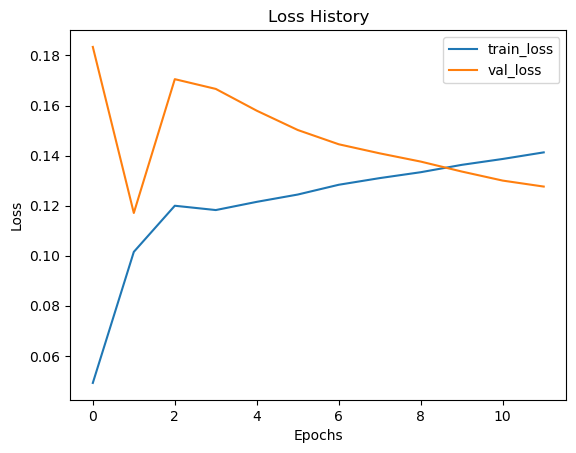

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

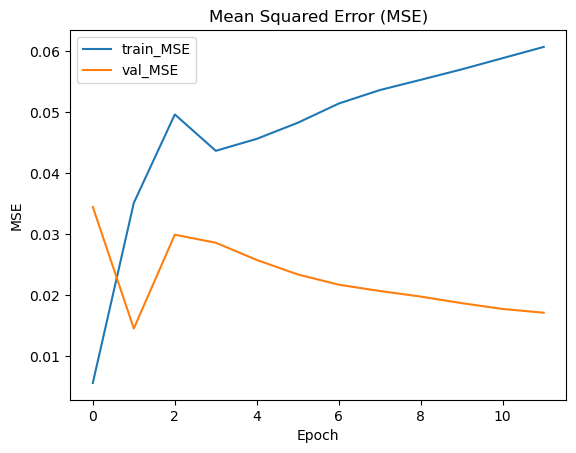

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

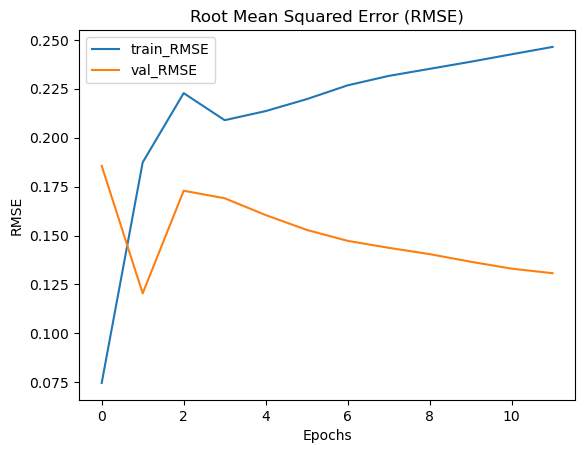

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

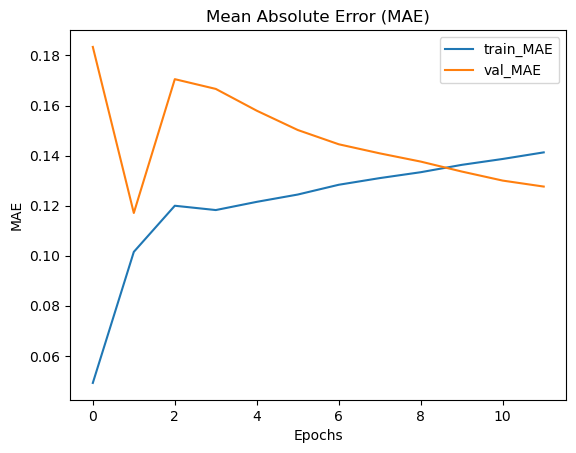

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

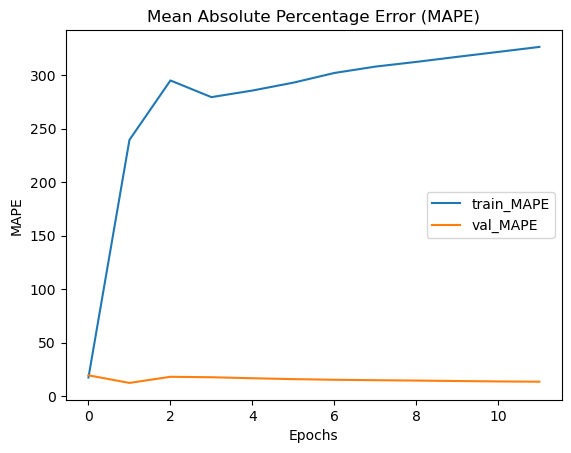

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 01:11:48.391438: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


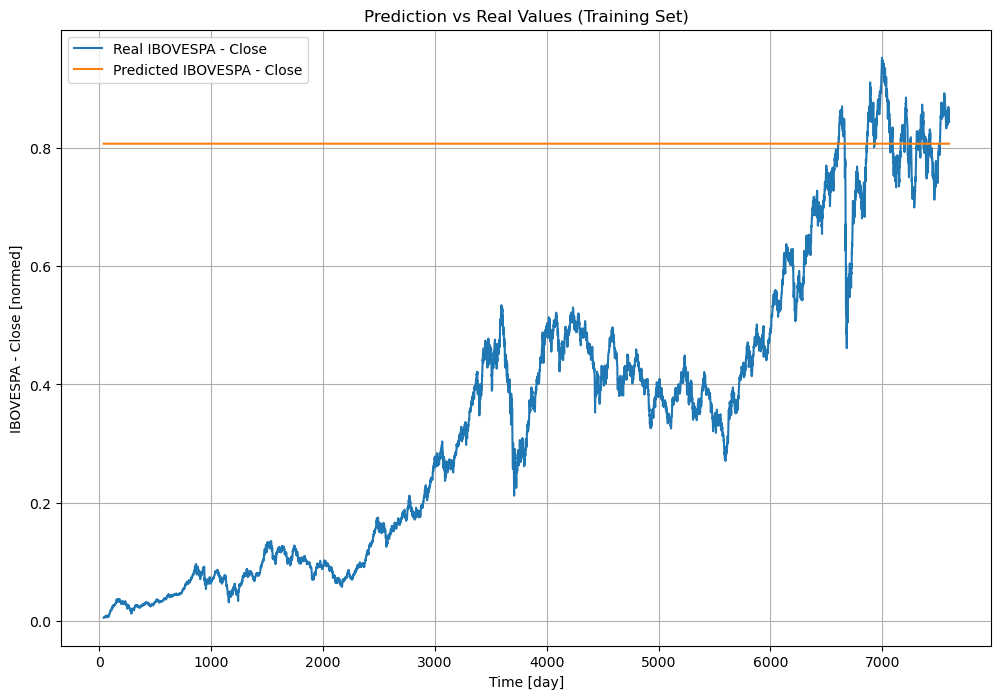

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


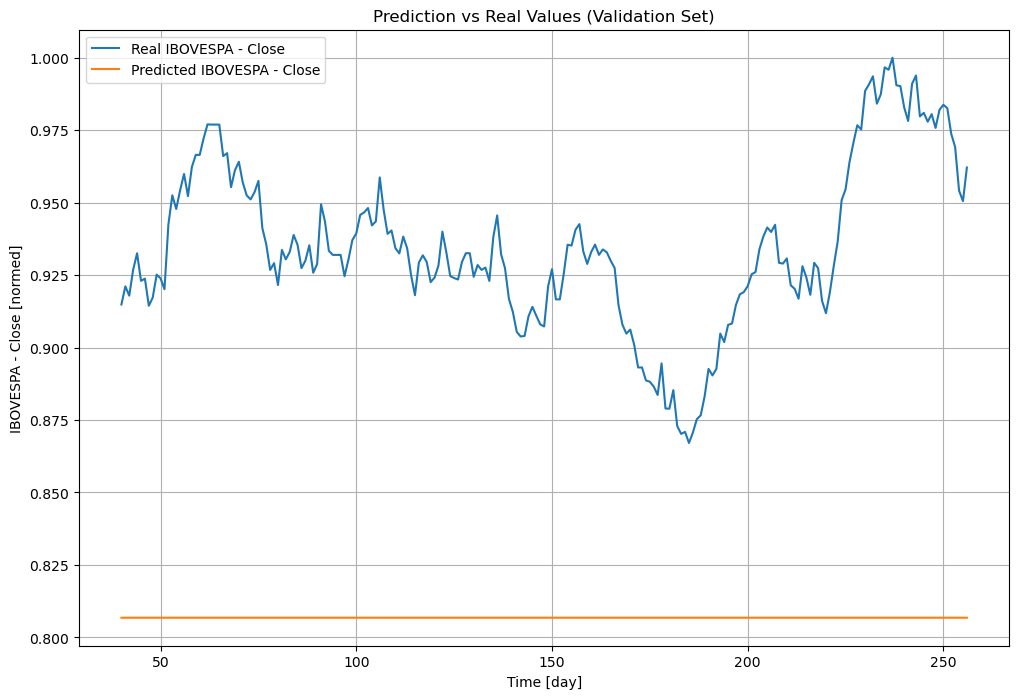

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


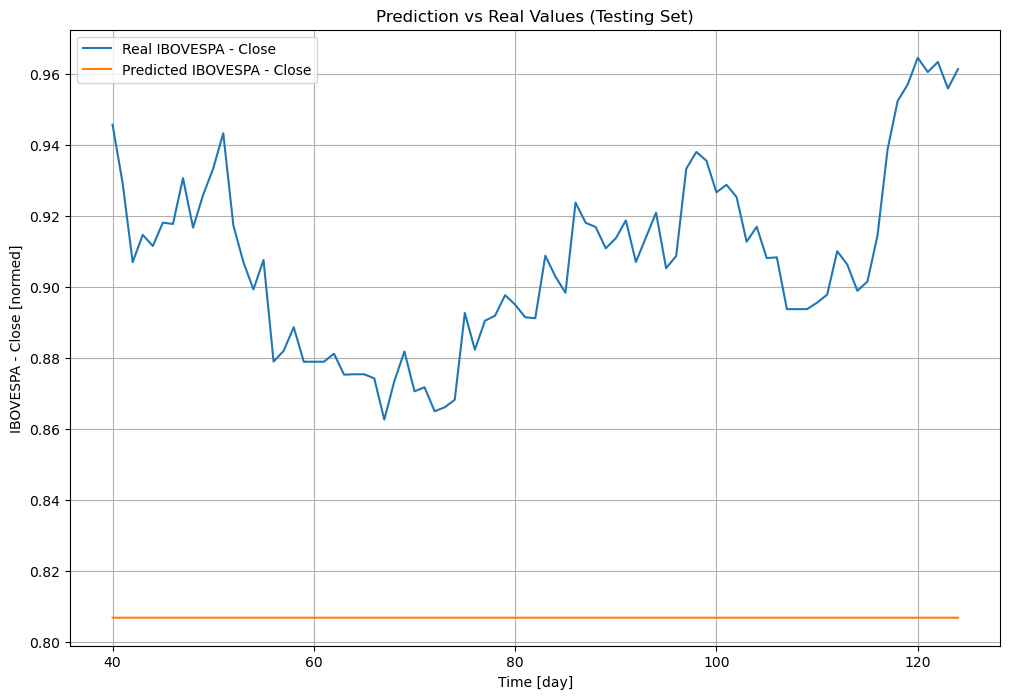

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

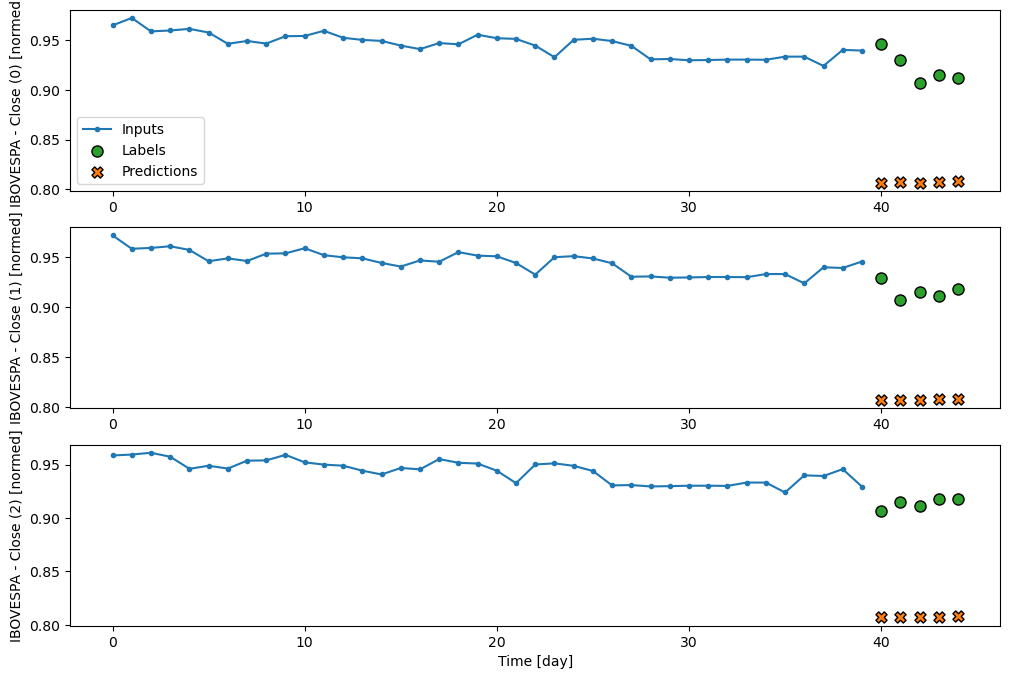

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:12s:781ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


array([[[0.8067889 , 0.8067889 , 0.8067889 , ..., 0.8067889 ,
         0.8067889 , 0.8067889 ],
        [0.8069675 , 0.8069675 , 0.8069675 , ..., 0.8069675 ,
         0.8069675 , 0.8069675 ],
        [0.8069487 , 0.8069487 , 0.8069487 , ..., 0.8069487 ,
         0.8069487 , 0.8069487 ],
        [0.80748427, 0.80748427, 0.80748427, ..., 0.80748427,
         0.80748427, 0.80748427],
        [0.8080462 , 0.8080462 , 0.8080462 , ..., 0.8080462 ,
         0.80804634, 0.80804634]],

       [[0.80678874, 0.80678874, 0.80678874, ..., 0.80678874,
         0.80678874, 0.80678874],
        [0.80696726, 0.80696726, 0.80696726, ..., 0.80696726,
         0.80696726, 0.80696726],
        [0.8069485 , 0.8069485 , 0.8069485 , ..., 0.8069485 ,
         0.8069485 , 0.8069485 ],
        [0.80748403, 0.80748403, 0.80748403, ..., 0.80748403,
         0.80748403, 0.80748403],
        [0.808046  , 0.808046  , 0.808046  , ..., 0.808046  ,
         0.8080461 , 0.8080461 ]],

       [[0.8067893 , 0.8067893 , 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')